# BF1Kart Project - INF505 Data Mining - 2020
## Team-Name: Data Meinung Team
### Mitglieder (Members): Abdurrahman ODABAŞI, Fırat Fuat OLCAY, Batıkan Bora ORMANCI, Muhammednur ŞEHEBİ


### 0. Intro <a class="anchor" id="chapter0"></a>


#### 0.1 Anforderungsanalyse (English Version - Requirement Analysis)<a class="anchor" id="section_0_1"></a>


The banking environment is characterized by saturated markets with high competitive pressure. Increased efforts are being made to counter the problems of **customers who are willing to change(1)** and other negative developments with marketing measures(2). Such marketing measures relate, for example, to
the distribution of banking products (e.g. credit cards). This allows Increasing profit margin per existing customer. However, marketing measures are associated with considerable costs.

The financial services company BestFinansBir (BF1) would like to ***introduce the BF1Kart to its customers as a new financial product.*** In order to carry out the marketing measures (telephone contact & consultation in the branch) cost-effectively, a data mining model is to be developed.
This model is intended to **predict whether BF1 customers will purchase the BF1Kart**. The customers identified in this way should first be **recruited(reached?)** through marketing

As a data basis, BF1 uses the data of a partner company in which a new credit card was recently introduced. It is assumed that the subsidiary's customers are structurally similar to its own customers.

As an employee in BF1's Big Data department, you will be tasked with developing the data mining model. In the next six weeks you should develop a model that has a high degree of classification accuracy.

To do this, use the data record provided: bank_marketing_adal_v1.0.csv. This data set is a modified data set of the ’Bank Marketing Data Set’ (https://archive.ics.uci.edu/ml/datasets/bank+marketing). The data record provided is structured as follows:
* ID: ID of the bank customer
* Age: Age of the customer
* Occupation: employee etc.
* Marital status: single, married or divorced
* Education: university degree, general university entrance qualification, etc.
* Failed: Indicates whether the customer has failed (aus der Bildung?)
* Account balance: account balance on the date the data was extracted
* Ownership: Indicates whether the customer owns a property
* Loan: Indicates whether the customer has loan obligations
* Duration: Duration of the business relationship in days
* Label: Indicates whether the customer has purchased the advertised banking product.

#### 0.2 Data Mining im Banking-Umfeld und in dem Sozialwissenschaftlichen Bereich <a class="anchor" id="section_0_1"></a>

Data Mining ist Kontextabhaengig...

Marketing is the most widely used area of data mining in banking. (Jayasree, 2013)

Today, more and more marketing departments of countless companies are analyzing the (mostly consuming) behaviour of the existing customers, to see how another product can be marketed to them (Petry, 2009)





#####**Literaturverzeichnis**
[1] Jayasree, V., & Balan, R. V. S. (2013). A review on data mining in banking sector. American Journal of Applied Sciences, 10(10), 1160.
 URL: http://thescipub.com/pdf/10.3844/ajassp.2013.1160.1165


[2] Petry, F. E., & Zhao, L. (2009). Data mining by attribute generalization with fuzzy hierarchies in fuzzy databases. Fuzzy Sets and Systems, 160(15), 2206-2223.



### 1. Datenverständnis (Data Understanding) <a class="anchor" id="chapter1"></a>

#### 1.0 Imports<a class="anchor" id="section_1_0"></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ACHTUNG! : Falls diese Pakete bei Ihnen nicht installiert sind, bitte führen Sie die folgenden Befehle durch:
!pip install eli5
!pip install pdpbox
!pip install shap

     |████████████████████████████████| 112kB 7.7MB/s 
     |████████████████████████████████| 57.7MB 74kB/s 
ERROR: Operation cancelled by user
     |████████████████████████████████| 358kB 9.7MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489388 sha256=ba7995ace982abcafdbee668b80938431efe63002b567843a298ac78351f923d
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


#### 1.1 Laden der Daten und Anzeige der Datenstruktur (Data Loading)<a class="anchor" id="section_1_1"></a>

In [ ]:
csv_path = 'https://raw.githubusercontent.com/odabashi/BF1Kart/master/data/BestFinansBir_v1.0.csv'
df = pd.read_csv(csv_path, sep = ';', decimal = ',')
print(df.shape)
df.info()
df.head(10) # Zeigt die ersten 10 Zeilen

(20493, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20493 entries, 0 to 20492
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Alter          20493 non-null  int64 
 1   Beruf          20493 non-null  object
 2   Familienstand  20493 non-null  object
 3   Ausbildung     20493 non-null  object
 4   Ausgefallen    20493 non-null  int64 
 5   Kontostand     20493 non-null  int64 
 6   Eigentum       20493 non-null  int64 
 7   Darlehen       20493 non-null  int64 
 8   Dauer          20493 non-null  int64 
 9   Label          20493 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.6+ MB


,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label
0,31,Freiberufler,verheiratet,Allgemeine Hochschulreife,0,162,1,1,0,1
1,28,Beamter,verheiratet,Allgemeine Hochschulreife,0,1595,0,0,1,0
2,39,Techniker,geschieden,Allgemeine Hochschulreife,0,17441,1,1,1,1
3,54,Arbeitslos,geschieden,Allgemeine Hochschulreife,0,925,0,0,2,0
4,24,Techniker,ledig,Allgemeine Hochschulreife,0,-156,1,0,4,0
5,27,Techniker,ledig,Allgemeine Hochschulreife,0,-69,0,0,4,0
6,40,unbekannt,ledig,Hochschulabschluss,0,15,0,1,4,0
7,30,Servicekraft,ledig,Hochschulabschluss,0,21,0,0,4,0
8,23,Student,ledig,Allgemeine Hochschulreife,0,43,0,0,4,0
9,27,Arbeitslos,ledig,Mittlere Reife,0,93,0,0,4,0


In [ ]:
df.tail() # Zeigt die letzte 5 Zeilen

,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label
20488,53,Angestellter,verheiratet,Mittlere Reife,0,5603,0,0,2372,1
20489,50,Techniker,ledig,Hochschulabschluss,0,2,0,0,2389,0
20490,41,Techniker,ledig,Allgemeine Hochschulreife,0,650,1,0,2420,1
20491,43,Angestellter,verheiratet,Mittlere Reife,0,3064,1,0,2453,1
20492,47,Angestellter,geschieden,Mittlere Reife,0,126,1,0,2456,1


In [ ]:
df.columns # Die Merkmale

Index(['Alter', 'Beruf', 'Familienstand', 'Ausbildung', 'Ausgefallen',
       'Kontostand', 'Eigentum', 'Darlehen', 'Dauer', 'Label'],
      dtype='object')

In [ ]:
# Check for the unique values in the dataset
df.nunique(axis=0, dropna=True) # Count distinct observations over requested axis. Return Series with number of distinct observations. Can ignore NaN values. axis:0 -> row-wise, dropna=True -> ignoriere NaN

Alter              52
Beruf              11
Familienstand       3
Ausbildung          4
Ausgefallen         2
Kontostand       5124
Eigentum            2
Darlehen            2
Dauer            1460
Label               2
dtype: int64

In [ ]:
# The columns that have a small amount of variety above should be taken into special consideration, as they are quite likely to be categorical
# However, here we will determine which features have nominal data that should be converted into dummy values later on (in section 2: Datenaufbereitung)
# Note that we didn't really have to discover these by ourselves, as these information about the dataset had already been explained to us by the project owner.
df['Familienstand'].unique()

array(['verheiratet', 'geschieden', 'ledig'], dtype=object)

In [ ]:
# Beschreibung aller Metriken in Bezug auf die Features.
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Alter,20493,NaN,NaN,NaN,39.4865,10.3343,18,32,37,47,69
Beruf,20493,11,unbekannt,4535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Familienstand,20493,3,verheiratet,11173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ausbildung,20493,4,Allgemeine Hochschulreife,10522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ausgefallen,20493,NaN,NaN,NaN,0.0114673,0.106472,0,0,0,0,1
Kontostand,20493,NaN,NaN,NaN,1428.93,2378.8,-4057,141,561,1640,19985
Eigentum,20493,NaN,NaN,NaN,0.567852,0.495387,0,0,1,1,1
Darlehen,20493,NaN,NaN,NaN,0.132338,0.338866,0,0,0,0,1
Dauer,20493,NaN,NaN,NaN,298.072,291.22,0,113,204,372,2456
Label,20493,NaN,NaN,NaN,0.237789,0.425739,0,0,0,0,1


In [ ]:
# Beschreibung aller Mertiken in Bezug auf nur die numerischen Features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alter,20493.0,39.486459,10.334257,18.0,32.0,37.0,47.0,69.0
Ausgefallen,20493.0,0.011467,0.106472,0.0,0.0,0.0,0.0,1.0
Kontostand,20493.0,1428.925926,2378.800022,-4057.0,141.0,561.0,1640.0,19985.0
Eigentum,20493.0,0.567852,0.495387,0.0,0.0,1.0,1.0,1.0
Darlehen,20493.0,0.132338,0.338866,0.0,0.0,0.0,0.0,1.0
Dauer,20493.0,298.071732,291.219876,0.0,113.0,204.0,372.0,2456.0
Label,20493.0,0.237789,0.425739,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Beschreibung aller Meriken in Bezug auf die Features von Kunden, die BF1Kart erworben haben
df[df.Label == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alter,4873.0,38.841576,10.418990,18.0,31.0,37.0,46.0,69.0
Ausgefallen,4873.0,0.004925,0.070013,0.0,0.0,0.0,0.0,1.0
Kontostand,4873.0,2069.625077,3405.346359,-3058.0,214.0,754.0,2326.0,19985.0
Eigentum,4873.0,0.406526,0.491235,0.0,0.0,0.0,1.0,1.0
Darlehen,4873.0,0.095219,0.293547,0.0,0.0,0.0,0.0,1.0
Dauer,4873.0,527.746768,380.376251,0.0,234.0,418.0,722.0,2456.0
Label,4873.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Beschreibung aller Meriken in Bezug auf die Features von Kunden, die BF1Kart nicht erworben haben
df[df.Label == 0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alter,15620.0,39.687644,10.299755,18.0,32.0,37.0,47.00,69.0
Ausgefallen,15620.0,0.013508,0.115441,0.0,0.0,0.0,0.00,1.0
Kontostand,15620.0,1229.045839,1907.588591,-4057.0,121.0,520.0,1481.25,14533.0
Eigentum,15620.0,0.618182,0.485848,0.0,0.0,1.0,1.00,1.0
Darlehen,15620.0,0.143918,0.351018,0.0,0.0,0.0,0.00,1.0
Dauer,15620.0,226.419590,211.056872,1.0,96.0,168.0,287.00,2389.0
Label,15620.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [ ]:
# Check for null values
df.isnull().sum()

Alter            0
Beruf            0
Familienstand    0
Ausbildung       0
Ausgefallen      0
Kontostand       0
Eigentum         0
Darlehen         0
Dauer            0
Label            0
dtype: int64

**Wie aus der obigen Ausgabe hervorgeht, enthält dieser Datensatz 0 Nullwerte. Sie müssen diese also nicht durch Ersetzen oder Löschen einiger Spalten usw. Behandeln**

##### **Are there any columns that we should drop, as they probably do not play a role on whether the product will be bought or not..?**
It may occasionally make sense to think about this before even attempting to calculate the weight of a feature, but in this project we will rely more on the plots and observations we make on the following sections...

#### 1.2 Explorative Datenanalyse (Eng: EDA: Explorative Data Analysis)<a class="anchor" id="section_1_2"></a>

* Data should be clean, and shoulnd't have any redundancies and missing values / null values
* Make sure you identify the important variables in the data set and remove all unnecessary noise in the data that may actually hinder the accuracy of our conclusions when we work on model building
* We must understand the relationships between the variables through EDA
* We must be able to derive conclusions or gather insights about the data for conclusive interpretation in order to move on to more complex processes in the data processing lifecycle

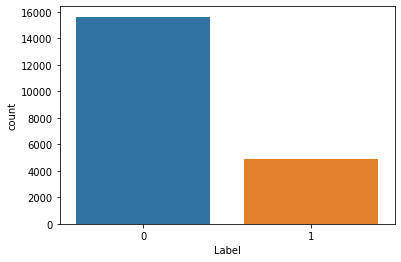

In [ ]:
# Das folgende Diagramm zeigt die Anzahl der Benutzer an, die sich für BF1Kart erworben/nich erworben haben.
sns.countplot(df['Label'])

##### 1.2.0 Superficial Relationship Analysis<a class="anchor" id="section_1_2_0"></a>

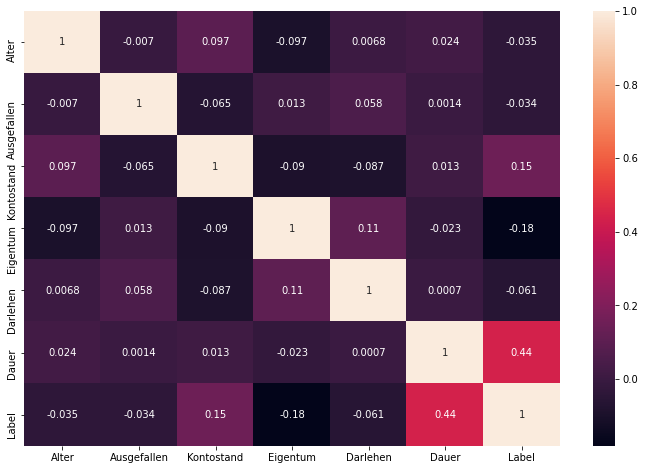

In [ ]:
# Zeigen das Korrelation zwischen der Merkmale (Correlation Matrix)
fig_dims = (12, 8)
correlation = df.corr() # Compute pairwise correlation of columns, excluding NA/null values.
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(correlation, ax = ax, annot=True)
plt.show() # This will be more reliable after the categorical values had been converted to numbers


    -1 zeigt eine perfekt negative lineare Korrelation zwischen zwei Variablen an
    0 zeigt keine lineare Korrelation zwischen zwei Variablen an
    1 zeigt eine perfekt positive lineare Korrelation zwischen zwei Variablen an

In [ ]:
df.nunique(axis=0, dropna=True)

Alter              52
Beruf              11
Familienstand       3
Ausbildung          4
Ausgefallen         2
Kontostand       5124
Eigentum            2
Darlehen            2
Dauer            1460
Label               2
dtype: int64

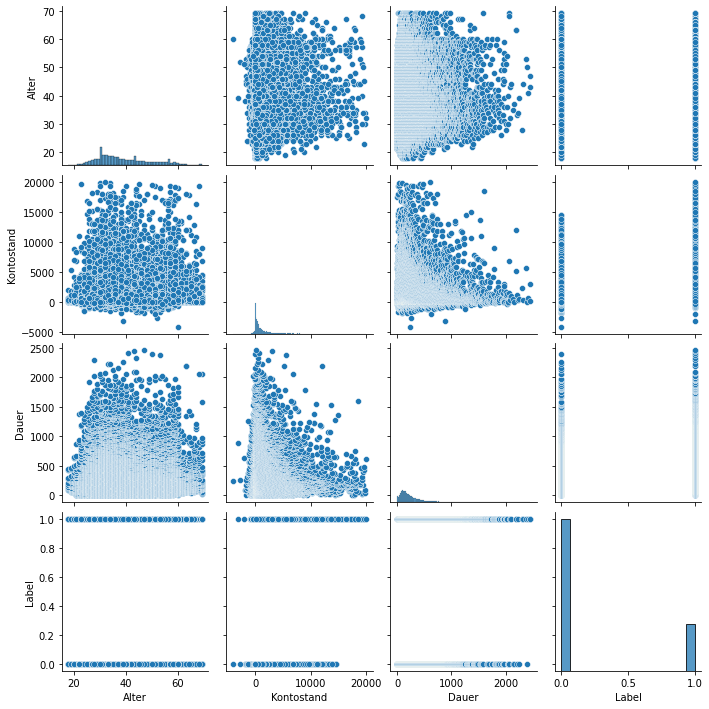

In [ ]:
sns.pairplot(df[['Alter', 'Kontostand', 'Dauer', 'Label']])

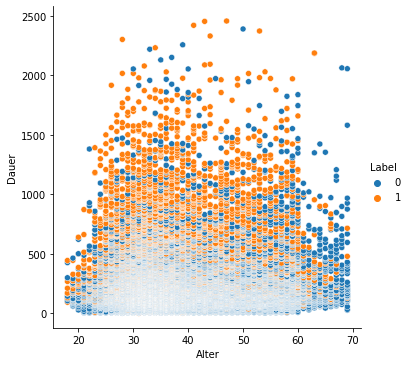

In [ ]:
sns.relplot(x='Alter', y='Dauer', hue='Label', data=df) # Deduction:  Non-Linear Correlation / No Correlation (somewhere in the middle)

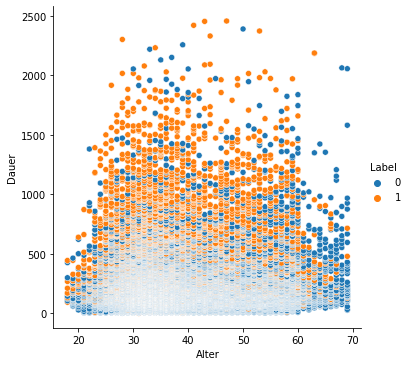

In [ ]:
sns.relplot(x='Alter', y='Dauer', hue='Label', data=df)

##### 1.2.1 Beruf<a class="anchor" id="section_1_2_1"></a>

In [ ]:
#Zeigen den Anteil der Kunden, die BF1Kart erworben haben, nach ihrem Beruf.
(df[df.Label == 1].Beruf.value_counts() / (df.Beruf.value_counts())).sort_values(ascending=False)

Student         0.343511
unbekannt       0.301874
Techniker       0.270622
Arbeitslos      0.270202
Hausgehilfin    0.256790
Selbständig     0.241558
Beamter         0.241145
Servicekraft    0.203150
Freiberufler    0.182515
Angestellter    0.178109
Rentner         0.018450
Name: Beruf, dtype: float64

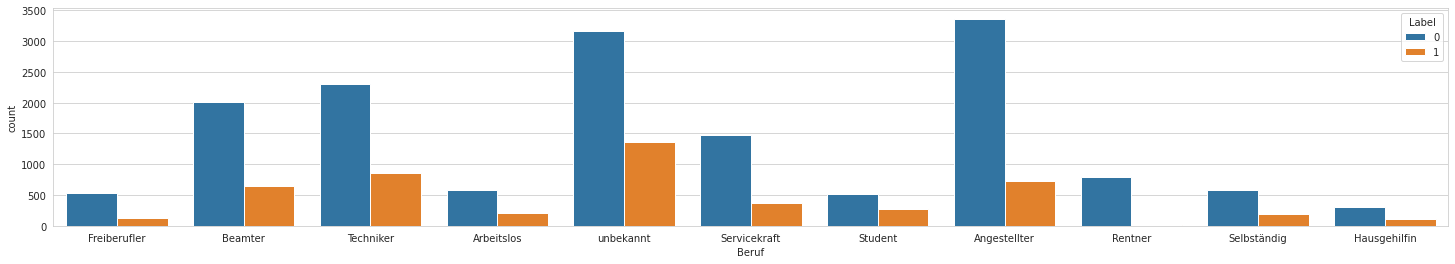

In [ ]:
# Das folgende Diagramm zeigt die Anzahl der Benutzer an, die
# nach ihrem Beruf sich für BF1Kart erworben/nich erworben haben.

sns.set_style("whitegrid")
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

plt.figure(figsize=(25,4))
sns.countplot(df["Beruf"],hue=df["Label"])

In [ ]:
df[(df['Beruf'] == 'Rentner') & (df['Label'] == 1)] # Es scheint, als gäbe es keine Beispiele mit dem Label 1 für diesen Beruf, aber es gibt tatsächlich einige Beispiele, der Prozentsatz ist nur sehr gering

,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label
2125,64,Rentner,verheiratet,Hochschulabschluss,0,14170,0,0,62,1
3826,61,Rentner,verheiratet,Allgemeine Hochschulreife,0,13164,0,0,92,1
5421,66,Rentner,verheiratet,Mittlere Reife,0,12767,0,0,117,1
8750,64,Rentner,geschieden,Hochschulabschluss,0,17875,0,0,173,1
8911,67,Rentner,verheiratet,Mittlere Reife,0,10776,0,0,176,1
8974,60,Rentner,verheiratet,Allgemeine Hochschulreife,0,18967,1,0,177,1
12105,68,Rentner,verheiratet,Allgemeine Hochschulreife,0,19317,1,0,249,1
14289,59,Rentner,verheiratet,Allgemeine Hochschulreife,0,17769,0,0,322,1
15277,64,Rentner,verheiratet,Mittlere Reife,0,12067,0,0,367,1
15353,63,Rentner,verheiratet,Allgemeine Hochschulreife,0,18016,0,0,371,1


##### 1.2.2 Familienstand<a class="anchor" id="section_1_2_2"></a>

In [ ]:
#Zeigen den Anteil der Kunden, die BF1Kart erworben haben, nach ihrem Familienstand.
(df[df.Label == 1].Familienstand.value_counts() / (df.Familienstand.value_counts())).sort_values(ascending=False)

ledig          0.271622
geschieden     0.224599
verheiratet    0.219010
Name: Familienstand, dtype: float64

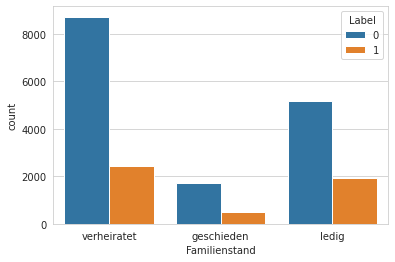

In [ ]:
# Das folgende Diagramm zeigt die Anzahl der Benutzer an, die
# nach ihrer Familienstand sich für BF1Kart erworben/nich erworben haben.
sns.set_style("whitegrid")
sns.countplot(df["Familienstand"],hue=df["Label"])

##### 1.2.3 Ausbildung<a class="anchor" id="section_1_2_3"></a>

In [ ]:
# Zeigen den Anteil der Kunden, die BF1Kart erworben haben, nach ihrer Ausbildung.
(df[df.Label == 1].Ausbildung.value_counts() / (df.Ausbildung.value_counts())).sort_values(ascending=False)

Hochschulabschluss           0.295323
unbekannt                    0.267746
Allgemeine Hochschulreife    0.217544
Mittlere Reife               0.164214
Name: Ausbildung, dtype: float64

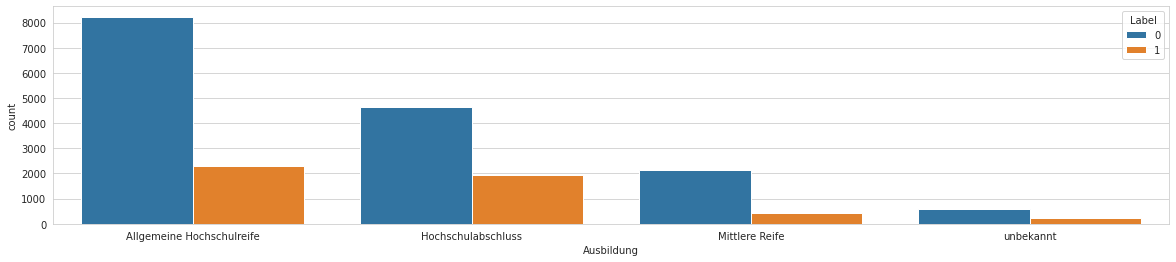

In [ ]:
# Das folgende Diagramm zeigt die Anzahl der Benutzer an, die
# nach ihrer Ausbildung sich für BF1Kart erworben/nich erworben haben.
sns.set_style("whitegrid")
plt.figure(figsize=(20,4))
sns.countplot(df["Ausbildung"],hue=df["Label"])

##### 1.2.4 Eigentum<a class="anchor" id="section_1_2_4"></a>

In [ ]:
# Zeigen den Anteil der Kunden, die BF1Kart erworben haben, nach ihrem Eigentum(ob der Kunde ein Eigentum besitzt oder nicht).
(df[df.Label == 1].Eigentum.value_counts() / (df.Eigentum.value_counts())).sort_values(ascending=False)

0    0.326558
1    0.170233
Name: Eigentum, dtype: float64

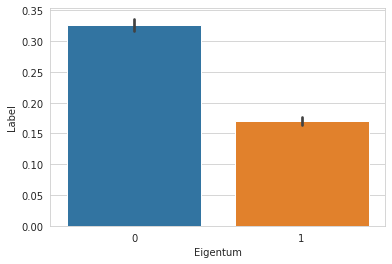

In [ ]:
sns.barplot(x='Eigentum', y='Label', data=df)

##### 1.2.5 Darlehen<a class="anchor" id="section_1_2_5"></a>

In [ ]:
# Zeigen den Anteil der Kunden, die BF1Kart erworben haben, nach ihrem Darlehen
(df[df.Label == 1].Darlehen.value_counts() / (df[df.Label == 1].Darlehen.value_counts())).sort_values(ascending=False)

1    1.0
0    1.0
Name: Darlehen, dtype: float64

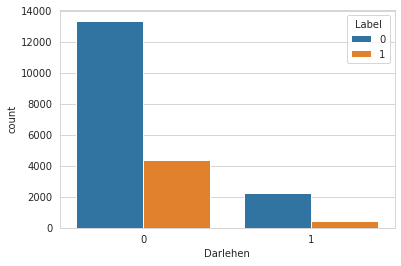

In [ ]:
# Das folgende Diagramm zeigt die Anzahl der Benutzer an, die
# nach ihrer Ausbildung sich für BF1Kart erworben/nich erworben haben.
sns.set_style("whitegrid")
sns.countplot(df["Darlehen"],hue=df["Label"])

##### 1.2.6 Alter<a class="anchor" id="section_1_2_6"></a>

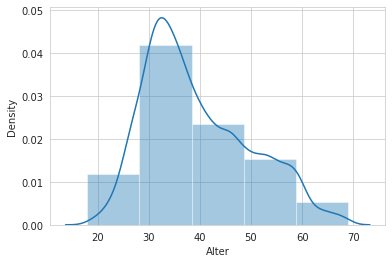

In [ ]:
sns.distplot(df['Alter'], bins=5) # Die Spitzen eines Dichte-Diagramms helfen bei der Anzeige, wo sich die Werte über das Intervall konzentrieren.


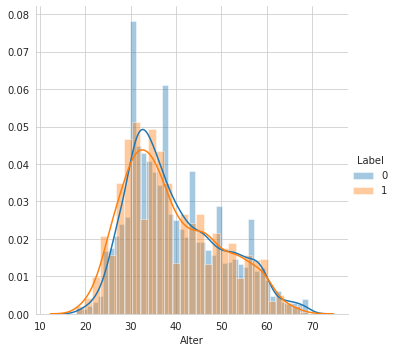

In [ ]:
# Das folgende Diagramm zeigt die Verteilung der Benutzer nach ihrem Alter in Bezug auf das Label an.
sns.FacetGrid(df,hue='Label',height=5).map(sns.distplot,'Alter').add_legend()

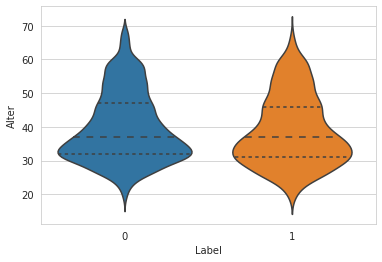

In [ ]:
# Teilen die Kunden nach dem Erwerben von BF1Kart , dann zeigen, wie sich die Kunden nach ihrem Alter verteilen
vp_alter =  sns.violinplot(x='Label', y ='Alter', data = df, inner="quartile")

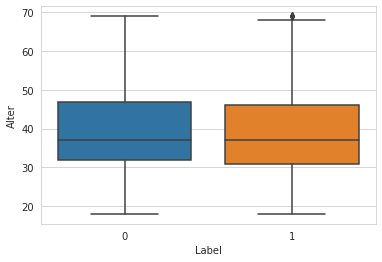

In [ ]:
# Das folgende Diagramm zeigt die Verteilung der Benutzer nach ihrem Alter in Bezug auf das Label an.
ax = sns.boxplot(x="Label", y="Alter", data=df)

##### 1.2.7 Dauer<a class="anchor" id="section_1_2_7"></a>

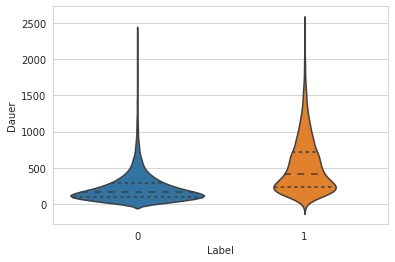

In [ ]:
# Teilen die Kunden nach dem Erwerben von BF1Kart , dann zeigen, wie sich die Kunden nach ihrer Dauer der Geschaeftsbeziehung verteilen
vp_dauer =  sns.violinplot(x='Label', y ='Dauer', data = df, inner="quartile")

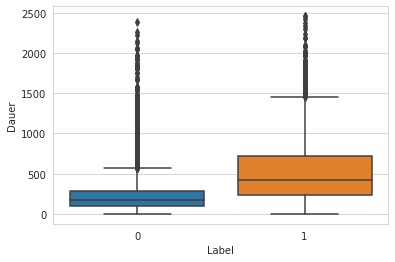

In [ ]:
# Das folgende Diagramm zeigt die Verteilung der Benutzer nach ihrer Dauer der Geschaeftsbeziehung in Bezug auf das Label an.
ax = sns.boxplot(x="Label", y="Dauer", data=df)

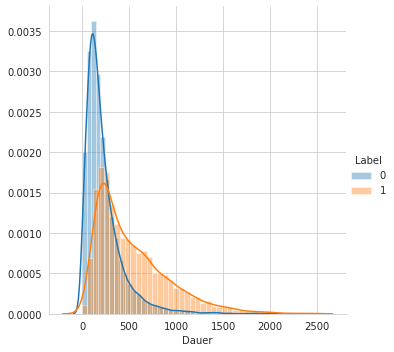

In [ ]:
# Das folgende Diagramm zeigt die Verteilung der Benutzer nach ihrer Dauer der Geschaeftsbeziehung in Bezug auf das Label an.
sns.FacetGrid(df,hue='Label',height=5).map(sns.distplot,'Dauer').add_legend()

##### 1.2.8 Kontostand<a class="anchor" id="section_1_2_8"></a>

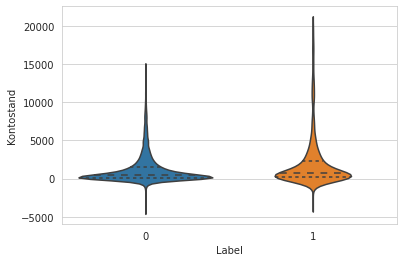

In [ ]:
# Teilen die Kunden nach dem Erwerben von BF1Kart , dann zeigen, wie sich die Kunden nach ihrem Kontostand verteilen
vp_ks =  sns.violinplot(x='Label', y ='Kontostand', data = df, inner="quartile")

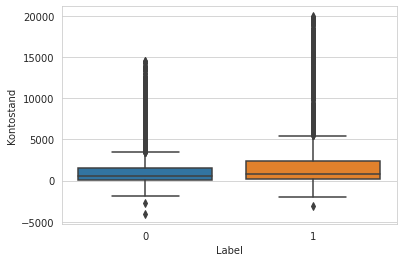

In [ ]:
# Das folgende Diagramm zeigt die Verteilung der Benutzer nach ihrem Kontostand in Bezug auf das Label an.
ax = sns.boxplot(x="Label", y="Kontostand", data=df)

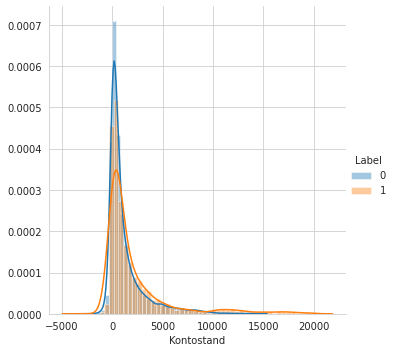

In [ ]:
# Das folgende Diagramm zeigt die Verteilung der Benutzer nach ihrem Kontostand in Bezug auf das Label an.
sns.FacetGrid(df,hue='Label',height=5).map(sns.distplot,'Kontostand').add_legend()

##### 1.2.9 Ausgefallen <a class="anchor" id="section_1_2_9"></a>

In [ ]:
# Zeigen den Anteil der Kunden, die BF1Kart erworben haben, nach ihrem "Ausgefall".
(df[df.Label == 1].Ausgefallen.value_counts() / (df.Ausgefallen.value_counts())).sort_values(ascending=False)

0    0.239362
1    0.102128
Name: Ausgefallen, dtype: float64

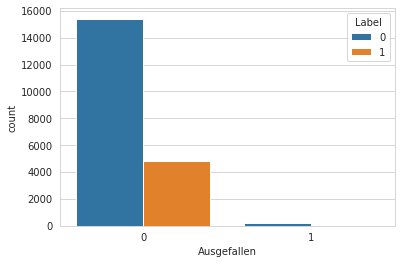

In [ ]:
# Das folgende Diagramm zeigt die Anzahl der Benutzer an, die
# nach ihrer Ausgefall sich für BF1Kart erworben/nich erworben haben.
sns.set_style("whitegrid")
sns.countplot(df["Ausgefallen"],hue=df["Label"])

#### 1.3 Data quality report <a class="anchor" id="section_1_3"></a>

**This subsubsection may even be completely removed, because we've interpreted the above explored data on our minds and started trying things right away...**

* Summary of the data we have:
  * 1.2.1: Beruf
    * Für die Berufe 'Freiberufler', 'Arbeitslos', 'Student', 'Rentner', 'Selbstaendig', 'Hausgehilfin' gibt es relativ geringe Data -> Das Resultat kann daher ein bias fuer die Berufe die mehrmals vorkommend sind haben
    ...

* Quality Issues
  * Die Daten sind aber nicht balanziert und überlappend
* Alternatives
  * There is no alternative data source
    * one isn't quite needed anyways as the data is not too insufficient
    * one isn't quite accessible for us anyways because we have to assume so for the homework.


OBJECTIVE ONE: Identify the faulty points in the data to remove them & clean the data later on:

OBJECTIVE TWO: Identify (detect) relationships in the variables to utilize them later on:


With the fulfillment of the two objectives above, we've finished the data exploration step
    

### 2. Datenaufbereitung (Data Processing)<a class="anchor" id="chapter2"></a>

#### 2.1 Einführung von Dummy-Variablen (Encoding) <a class="anchor" id="section_2_1"></a>
Da es in diesem Projekt Das Algorithmus Random-Forest verwendet werden,  müssen alle nominale Merkmale zu metrische Merkmale umgewandelt werden.

Was macht die Funktion 'get_dummies'?: 'Convert categorical variable into dummy/indicator variables.'

In [ ]:
dummies = ['Beruf', 'Familienstand', 'Ausbildung']
df_dummy = pd.get_dummies(df[dummies])

In [ ]:
df_dummy.head()

,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0


In [ ]:
dta = pd.concat([df_dummy, df[df.columns.difference(dummies)]], axis='columns')
dta.head()

,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Alter,Ausgefallen,Darlehen,Dauer,Eigentum,Kontostand,Label
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,31,0,1,0,1,162,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,28,0,0,1,0,1595,0
2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,39,0,1,1,1,17441,1
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,54,0,0,2,0,925,0
4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,24,0,0,4,1,-156,0


#### 2.2 Eliminierung der Duplikate (Duplicate Elimination)

In [ ]:
duplicatedRows = dta[dta.duplicated()] # Es gibt nur 3
duplicatedRows

,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Alter,Ausgefallen,Darlehen,Dauer,Eigentum,Kontostand,Label
3804,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,33,0,0,92,0,1390,0
4152,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,30,0,0,98,1,438,0
8123,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,39,0,0,162,1,782,0


In [ ]:
dta = dta.drop_duplicates()
dta.info()

#### 2.3 Aufteilung in die Trainings- und Testdatensatz (Data Splits)<a class="anchor" id="section_2_2"></a>

In [ ]:
from sklearn.model_selection import train_test_split

predictors = [x for x in dta.columns if x not in ['Label']]
X = dta[predictors]
y = dta.Label # same as dta[Label]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,  #  stratify parameter will preserve the proportion of target as in original dataset, in the train and test datasets as well.

    random_state=4711 # Wie in der Aufgabenstellung angegeben
)
X_train.head()

,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Alter,Ausgefallen,Darlehen,Dauer,Eigentum,Kontostand
2042,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,49,0,0,61,0,-969
17745,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,40,0,1,570,1,188
9342,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,35,0,0,185,1,443
11756,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,32,0,0,240,1,335
16887,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,69,0,0,478,0,482


In [ ]:
X_train.describe()

In [ ]:
y_train.head()

2042     0
17745    1
9342     0
11756    0
16887    1
Name: Label, dtype: int64

In [ ]:
y_train.describe()

count    14343.000000
mean         0.237816
std          0.425761
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Label, dtype: float64

In [ ]:
print('Shape Trainingsdatensatz: ', X_train.shape)
print('Shape Testdatensatz: ', X_test.shape)

Shape Trainingsdatensatz:  (14343, 24)
Shape Testdatensatz:  (6147, 24)


#### 2.4 Behandlung von Ausreißer (Handling Outliers)

Es gibt zwei wesentliche Gründe für das Auftreten von Ausreißern
1. Fehler bei der Datenerfassung
2. Reale richtige Daten mit großer Entfernung vom Mittelwert

Durch Datenexploration und -beobachtung wurde festgestellt, dass die Ausreißer des Datensatzes echte reale Daten sind. Der Umgang mit Ausreißern ist daher keine technische, sondern eine inhaltliche Angelegenheit. Aus diesem Grund wurden verschiedene Methoden zur Behandlung von Ausreißern ausprobiert, und das Ergebnis war, dass die Behandlung von Ausreißern unter Verwendung des Random-Forest-Algorithmus keine besonders guten Ergebnisse oder Erkenntnisse liefert, da dieser Algorithmus gegenüber Ausreißern sehr robust ist. Trotzdem und zum Zwecke der Aufzeichnung wurden die versuchten Verfahren in diese Datei unter dem Abschnitt "Prozeduren versucht, aber nicht verwendet" geschrieben.

#### 2.5 Merkmalsauswahl (Feature Selection)

Die Merkmalsauswahl bezieht sich auf den Prozess der Reduzierung der Eingaben für die Verarbeitung und Analyse bzw. auf das Finden der aussagekräftigsten Eingaben

Die Merkmalsauswahl wurde intensiv untersucht und es wurde die Schlussfolgerung gezogen, dass die Merkmalsauswahl keine Verbesserungen hinsichtlich der Aaccuracy oder anderer Messmethoden bringt. Trotzdem und zum Zwecke der Aufzeichnung wurden die versuchten Verfahren in diese Datei unter dem Abschnitt "Prozeduren versucht, aber nicht verwendet" geschrieben.

#### 2.6 Merkmalsreduzierung durch PCA (Principal Component Analysis)

Eigentlich konnten wir die PCA-Methode nicht so gut einsetzen. Da die ersten Komponenten den größten Teil der Varianz der Daten nicht erklären konnten (Die erklärten Varianzen der Komponenten zueinander sehr nah waren), was uns die Möglichkeit nicht geben konnte, zu wissen und zu demonstrieren, auf welche Anzahl der Komponenten gekommen sein soll.

Zudem hatten wir das Gefühl, dass bei solchen erklärten Varianzen eine Menge von Informationen mit hoher Wahrscheinlichkeit zu verlieren ist. Deswegen haben wir dieses Verfahren ausprobiert aber im Lauf des Projekts nicht verwendet.

Darüber hinaus werden wir versuchen, in zukünftigen Projekten danach zu streben, dass wir dieses Verfahren mithilfe von Pipelines einzusetzen, damit wir die optimierten Komponenten auswählen können, die den optimierten Hyperparametern entsprechen.


### 3. Modellierung (Modeling)<a class="anchor" id="chapter3"></a>

#### 3.1 Hyperparameter Optimisierung mit Kreuzvalidierung<a class="anchor" id="section_3_1"></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# class_weights = []

# for i in range (1, 11):
#     for j in range (1, 11):
#         class_weights.append(dict({1:i, 0:j}))

# param_grid = {
#     'max_depth': [100, 150, 200],
#     'min_samples_leaf': [1, 3, 20, 50],
#     'min_samples_split':[15, 30, 60],
#     'n_estimators': [50, 100, 200],
#     'class_weight': class_weights
# }

In [ ]:
# rf = RandomForestClassifier()

# grid_search = GridSearchCV(
#     estimator = rf,
#     param_grid = param_grid,
#     cv = 3, # Anzahl von "Fold" der Kreuzvalidierung
#     n_jobs = -1, # Nutzung aller verfügbaren Kerne der CPU
#     verbose = 2 # Steuert die Ausführlichkeit: Je höher, desto mehr Nachrichten.
# )

In [ ]:
 # grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [ ]:
# Die beste gefundene Parameter
# n_estimators=300,
# min_samples_split= 15,
# min_samples_leaf= 2,
# max_depth= 150
# class_weight = "balanced"

#### 3.2 Bagging (Randomforest)<a class="anchor" id="section_3_2"></a>

In [ ]:
model_rf = RandomForestClassifier(
    random_state = 4711,
    n_estimators=300,
    min_samples_split= 15,
    min_samples_leaf= 2,
    max_depth= 150,
    bootstrap=True,
    class_weight = 'balanced',
    n_jobs = -1
)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=150, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=4711, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.tree import export_text

estimator_0 = model_rf.estimators_[0]
estimator_1 = model_rf.estimators_[1]

In [ ]:
tree_rules_0 = export_text(estimator_0, feature_names=list(X_train))
print(tree_rules_0)

|--- Eigentum <= 0.50
|   |--- Dauer <= 170.50
|   |   |--- Beruf_Rentner <= 0.50
|   |   |   |--- Beruf_Techniker <= 0.50
|   |   |   |   |--- Ausgefallen <= 0.50
|   |   |   |   |   |--- Kontostand <= 839.50
|   |   |   |   |   |   |--- Alter <= 29.50
|   |   |   |   |   |   |   |--- Beruf_Arbeitslos <= 0.50
|   |   |   |   |   |   |   |   |--- Dauer <= 86.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- Dauer >  86.50
|   |   |   |   |   |   |   |   |   |--- Beruf_Beamter <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Kontostand <= 6.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- Kontostand >  6.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |--- Beruf_Beamter >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Beruf_Arbeitslos >  0.50
|   |   |   |   |   |   | 

In [ ]:
tree_rules_1 = export_text(estimator_1, feature_names=list(X_train))
print(tree_rules_1)

|--- Eigentum <= 0.50
|   |--- Ausbildung_Allgemeine Hochschulreife <= 0.50
|   |   |--- Familienstand_ledig <= 0.50
|   |   |   |--- Beruf_unbekannt <= 0.50
|   |   |   |   |--- Alter <= 57.50
|   |   |   |   |   |--- Kontostand <= 2035.50
|   |   |   |   |   |   |--- Ausbildung_Hochschulabschluss <= 0.50
|   |   |   |   |   |   |   |--- Beruf_Rentner <= 0.50
|   |   |   |   |   |   |   |   |--- Beruf_Servicekraft <= 0.50
|   |   |   |   |   |   |   |   |   |--- Kontostand <= 1454.50
|   |   |   |   |   |   |   |   |   |   |--- Alter <= 46.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Alter >  46.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |--- Kontostand >  1454.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- Beruf_Servicekraft >  0.50
|   |   |   |   |   |   |   |   |   |--- Darlehen <=

#### 3.3 Erstellung von Prädiktionen<a class="anchor" id="section_3_3"></a>

In [ ]:
predictions = model_rf.predict(X_test)
predicted_probability = model_rf.predict_proba(X_test)
results = X_test.copy()
results['Label'] = y_test
results['prediction'] = predictions
results['probability'] = predicted_probability[:,1]
results.head()

,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Alter,Ausgefallen,Darlehen,Dauer,Eigentum,Kontostand,Label,prediction,probability
17212,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,56,0,0,511,0,12,1,1,0.633563
18379,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,31,0,0,657,0,156,1,1,0.846384
12431,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,21,0,0,258,0,2488,1,1,0.793392
554,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,27,0,0,17,0,10,0,0,0.073458
930,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,59,0,1,29,0,101,0,0,0.184168


In [ ]:
results['tree0_probability'] = estimator_0.predict_proba(X_test)[:,1]
results['tree1_probability'] = estimator_1.predict_proba(X_test)[:,1]

In [ ]:
results['probability_tree_mean'] = (results['tree0_probability'] + results['tree1_probability']) / 2

In [ ]:
results.head()

,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Alter,Ausgefallen,Darlehen,Dauer,Eigentum,Kontostand,Label,prediction,probability,tree0_probability,tree1_probability,probability_tree_mean
17212,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,56,0,0,511,0,12,1,1,0.633563,1.000000,0.191855,0.595928
18379,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,31,0,0,657,0,156,1,1,0.846384,0.941262,0.531046,0.736154
12431,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,21,0,0,258,0,2488,1,1,0.793392,0.804711,0.903980,0.854345
554,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,27,0,0,17,0,10,0,0,0.073458,0.000000,0.000000,0.000000
930,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,59,0,1,29,0,101,0,0,0.184168,0.328357,0.000000,0.164179


#### 3.4 Interpretation des Modells mit der Methoden der Explainable artificial intelligence (XAI).

In [ ]:
for name, importance in zip(X_train, model_rf.feature_importances_):
    print(name, "=", importance)

Beruf_Angestellter = 0.009000948791991698
Beruf_Arbeitslos = 0.004426048904466256
Beruf_Beamter = 0.007546506070745192
Beruf_Freiberufler = 0.00514539834748585
Beruf_Hausgehilfin = 0.003785890937264184
Beruf_Rentner = 0.03463549662496657
Beruf_Selbständig = 0.004510936562975991
Beruf_Servicekraft = 0.005238046144908015
Beruf_Student = 0.004039610915540906
Beruf_Techniker = 0.007293123726167307
Beruf_unbekannt = 0.009125957005671021
Familienstand_geschieden = 0.0055889263256912805
Familienstand_ledig = 0.007329863720084037
Familienstand_verheiratet = 0.007557305240514594
Ausbildung_Allgemeine Hochschulreife = 0.007241231094819215
Ausbildung_Hochschulabschluss = 0.011778531207184266
Ausbildung_Mittlere Reife = 0.007286903665809984
Ausbildung_unbekannt = 0.0036684552404396683
Alter = 0.09781890365942321
Ausgefallen = 0.0026245540849923372
Darlehen = 0.012290981771939607
Dauer = 0.5157241740039001
Eigentum = 0.0662750943626865
Kontostand = 0.16006711159033216


##### 3.4.1 XAI mit Permutation Importance Plots
Hier versuchen wir zu verstehen, inwiefern ein Merkmal die Vorhersagen eines Modells beeinflusst.

In [ ]:
import eli5 as eli5
from eli5.sklearn import PermutationImportance

# Merkmale mit höheren Gewichte haben größeren Einfluss auf die Vorhersage des Modells
perm = PermutationImportance(
    model_rf,
    random_state=4711,
).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1479 ± 0.0020,Dauer
0.0254 ± 0.0042,Eigentum
0.0212 ± 0.0036,Kontostand
0.0159 ± 0.0030,Beruf_Rentner
0.0042 ± 0.0041,Alter
0.0013 ± 0.0007,Beruf_Selbständig
0.0009 ± 0.0020,Familienstand_ledig
0.0009 ± 0.0008,Beruf_Servicekraft
0.0009 ± 0.0024,Familienstand_verheiratet
0.0009 ± 0.0018,Ausbildung_Mittlere Reife


In [ ]:
# Merkmale mit höheren Gewichte haben größeren Einfluss auf die Vorhersage des Modells
# Hier wird das Gewicht eines Merkmals durch das 'Gain' eines Merkmals gerechnet
eli5.show_weights(model_rf, feature_names =list(X_test.columns))

Weight,Feature
0.5157 ± 0.0409,Dauer
0.1601 ± 0.0303,Kontostand
0.0978 ± 0.0254,Alter
0.0663 ± 0.0257,Eigentum
0.0346 ± 0.0171,Beruf_Rentner
0.0123 ± 0.0059,Darlehen
0.0118 ± 0.0118,Ausbildung_Hochschulabschluss
0.0091 ± 0.0074,Beruf_unbekannt
0.0090 ± 0.0088,Beruf_Angestellter
0.0076 ± 0.0057,Familienstand_verheiratet


In [ ]:
# Hier können wir sehen, inwiefern beeinflussen die Merkmale der Produktionen eines Modelles mit einem Beispiel

# Beispiel 1:
doc_num = 0
print('Tatsächliches Label:', y_test.iloc[doc_num])
print('Vorhergesagtes Label:', predictions[doc_num])
eli5.show_prediction(model_rf, X_test.iloc[doc_num],
                     feature_names=list(X_test.columns),
                     show_feature_values=True)

Tatsächliches Label: 1
Vorhergesagtes Label: 1


In [ ]:
# Beispiel 2:
doc_num = 5
print('Tatsächliches Label:', y_test.iloc[doc_num])
print('Vorhergesagtes Label:', predictions[doc_num])
eli5.show_prediction(model_rf, X_test.iloc[doc_num],
                     feature_names=list(X_test.columns),
                     show_feature_values=True)

Tatsächliches Label: 0
Vorhergesagtes Label: 0


##### 3.4.2 XAI mit Partial Dependence Plots
Hier versuchen wir zu verstehen, wie ein Merkmal die Vorhersagen eines Modells beeinflusst.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


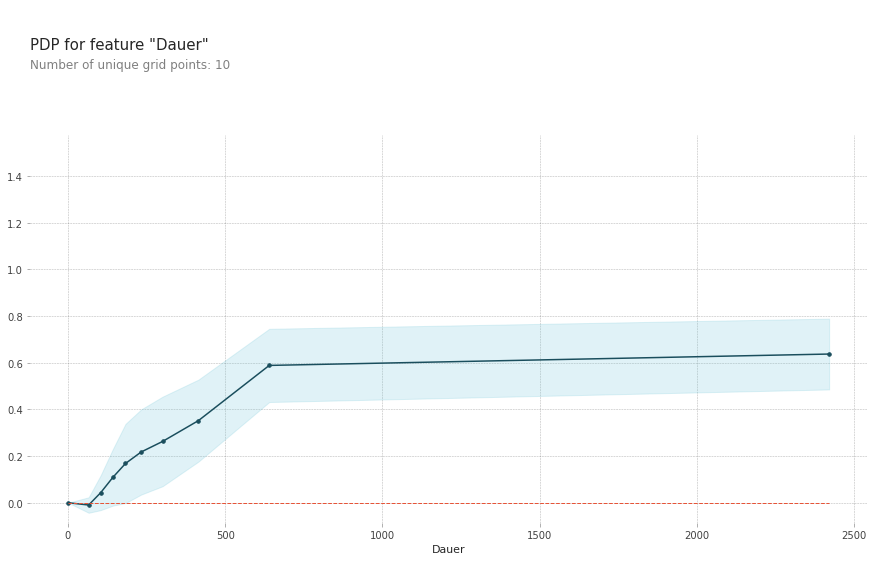

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

# Die y-Achse wird als Änderung der Vorhersage mit der Änderung der Ausprägung dieses Merkmals interpretiert.
# Dauer
pdp_dauer = pdp.pdp_isolate(model=model_rf, dataset=X_test, model_features=X_test.columns, feature='Dauer')
pdp.pdp_plot(pdp_dauer, 'Dauer')
plt.show()

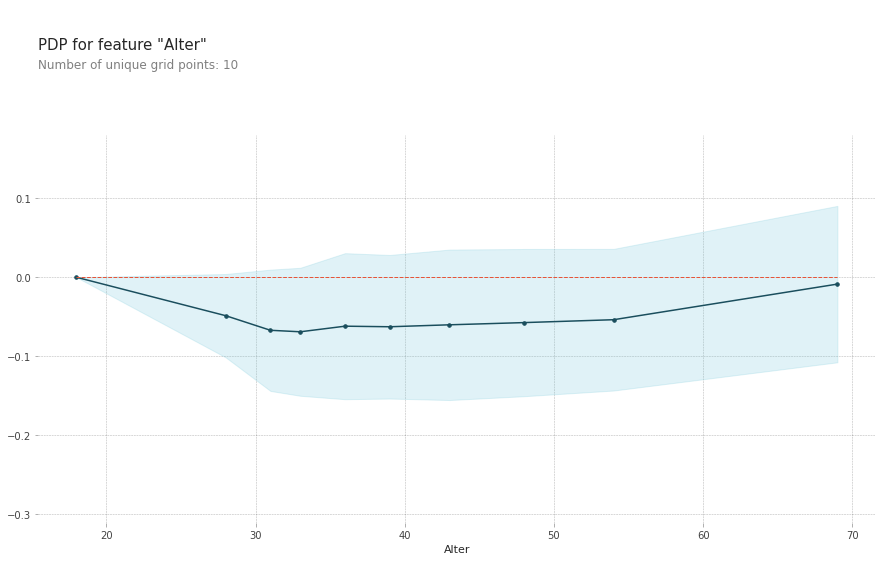

In [ ]:
# Alter
pdp_alter = pdp.pdp_isolate(model=model_rf, dataset=X_test, model_features=X_test.columns, feature='Alter')
pdp.pdp_plot(pdp_alter, 'Alter')
plt.show()

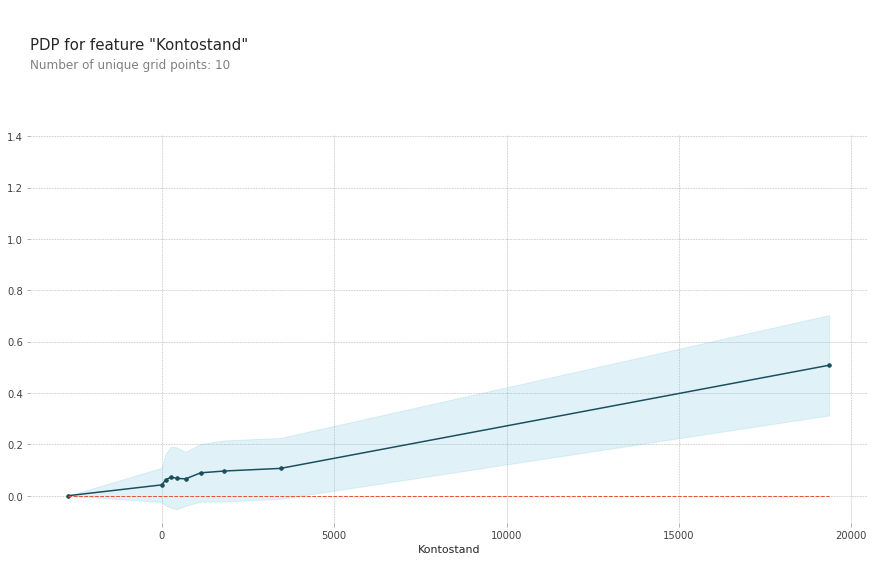

In [ ]:
# Kontostand
pdp_kontostand = pdp.pdp_isolate(model=model_rf, dataset=X_test, model_features=X_test.columns, feature='Kontostand')
pdp.pdp_plot(pdp_kontostand, 'Kontostand')
plt.show()

##### 3.4.2 XAI SHAP-Werte

SHAP-Werte (Abkürzung für SHapley Additive exPlanations) sind dabei hilfreich, den Einfluss eines Merkmals zu erklären und veranschaulichen. SHAP-Werte können einen Wert zwischen 1 und 0 haben. Sie entsprechen dem Verhalten eines Modells, wenn man die Werte eines Merkmals im Vergleich zu einem Basiswert ändert.

In [ ]:
# Achtung! : Die folgenden Befehle werden wahrscheinlich bei Ihnen sehr lange dauern (20-25 Min). Wir haben den Code
# ausgeführt und die Ergebnisse als Bilder dargestellt.

# import shap

# explainer = shap.TreeExplainer(model_rf)
# shap_values = explainer.shap_values(X_test)

In [ ]:
# shap.summary_plot(shap_values[1], X_test)

![summary-plot.png](https://i.ibb.co/jWtdP3w/summary-plot.png)

###### SHAP Dependence Contribution Plots
Aus der obigen Abbildung ist ersichtlich, dass der Einfluss eines Merkmals nicht absolut ist und von den Werten anderer Merkmale abhängt. Die folgenden Abbildungen zeigen die Korrelation zwischen den Merkmalen in Verhältnis zu SHAP-Werte.

In [ ]:
# shap.dependence_plot('Dauer', shap_values[1], X_test, interaction_index="Kontostand")

![DK.png](https://i.ibb.co/NF30x8Y/DK.png.png)

In [ ]:
# shap.dependence_plot('Dauer', shap_values[1], X_test, interaction_index="Alter")

![DA.png](https://i.ibb.co/7bWPbdL/DA.png)

In [ ]:
# shap.dependence_plot('Dauer', shap_values[1], X_test, interaction_index="Eigentum")

![DE.png](https://i.ibb.co/0B63Ksz/DE.png)

In [ ]:
# shap.dependence_plot('Kontostand', shap_values[1], X_test, interaction_index="Dauer")

![KD.png](https://i.ibb.co/P6MFXp1/KD.png)

In [ ]:
# shap.dependence_plot('Kontostand', shap_values[1], X_test, interaction_index="Alter")

![KA.png.png](https://i.ibb.co/hYCjQYz/KA.png)

In [ ]:
# shap.dependence_plot('Kontostand', shap_values[1], X_test, interaction_index="Eigentum")

![KE.png.png](https://i.ibb.co/tbmKnjX/KE.png)

In [ ]:
# shap.dependence_plot('Alter', shap_values[1], X_test, interaction_index="Dauer")

![AD.png](https://i.ibb.co/hgdKvR1/AD.png)

In [ ]:
# shap.dependence_plot('Alter', shap_values[1], X_test, interaction_index="Eigentum")

![AE.png](https://i.ibb.co/Mnh2Mbh/AE.png)

In [ ]:
# shap.dependence_plot('Alter', shap_values[1], X_test, interaction_index="Kontostand")

![AK.png](https://i.ibb.co/r2jwSzW/AK.png)

### 4. Evaluation <a class="anchor" id="chapter4"></a>

#### 4.1 Analyse der Abweichungen <a class="anchor" id="section_4_1"></a>

In [ ]:
ab_data = results[(results['Label'] == 1) & (results['prediction'] == 0)]
ab_data.head()

,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Alter,Ausgefallen,Darlehen,Dauer,Eigentum,Kontostand,Label,prediction,probability,tree0_probability,tree1_probability,probability_tree_mean
6903,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,27,0,0,142,0,453,1,0,0.384191,0.225621,0.000000,0.112810
16309,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,48,0,1,431,0,0,1,0,0.387368,0.485233,0.444824,0.465028
9980,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,28,0,0,199,1,-46,1,0,0.212637,0.000000,0.141780,0.070890
8285,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,43,0,0,165,1,2557,1,0,0.449311,0.368174,0.299388,0.333781
9750,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,39,0,0,194,0,224,1,0,0.402793,0.637740,0.578688,0.608214


#### 4.2 Konfusionsmatrix <a class="anchor" id="section_4_2"></a>

##### 4.2.1 Analyse der Verteilung <a class="anchor" id="section_4_2_1"></a>

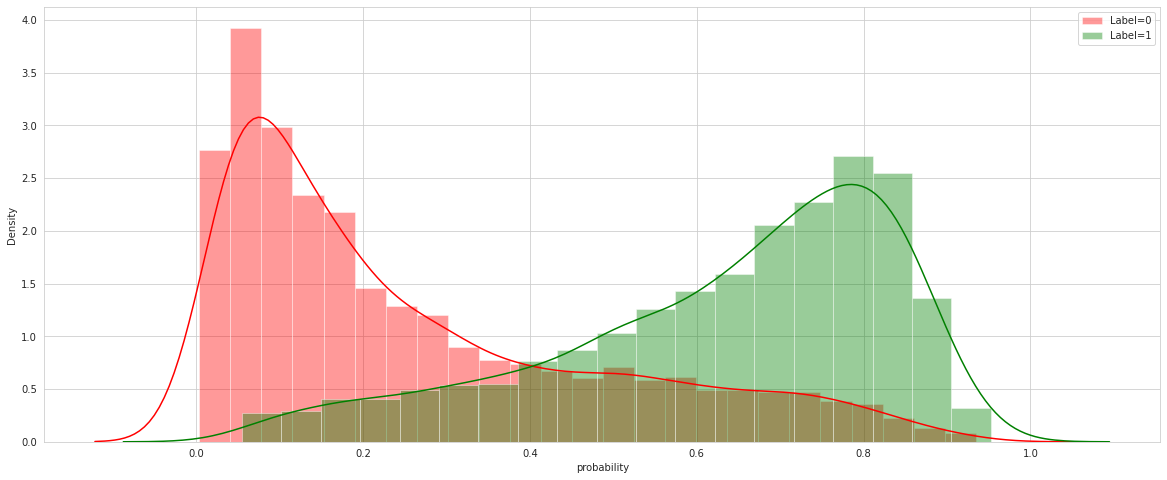

In [ ]:
# Das folgende Diagramm zeigt, wie verteilt sich das Label in Bezug auf die Wahrscheinlichkeit.
plt.figure(figsize=(20,8))
sns.distplot(results[results["Label"]==0]["probability"],label="Label=0",color="r")
sns.distplot(results[results["Label"]==1]["probability"],label="Label=1",color="g")
plt.legend()

##### 4.2.2 Konfusionsmatrix <a class="anchor" id="section_4_2_2"></a>

Text(0.5, 42.0, 'Prediction')

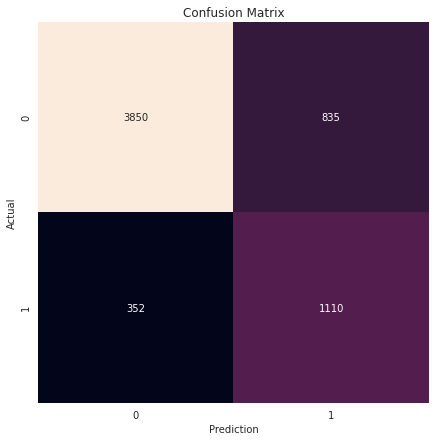

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(results['Label'], results['prediction'])
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')

In [ ]:
print('Richtig Positiv (True Positive, tp):', cm[1][1])
print('Falsch Positiv (False Positive, fp):', cm[0][1])
print('Falsch Negativ (False Negative, fn):', cm[1][0])
print('Richtig Negativ (True Negative, tn):', cm[0][0])

Richtig Positiv (True Positive, tp): 1110
Falsch Positiv (False Positive, fp): 835
Falsch Negativ (False Negative, fn): 352
Richtig Negativ (True Negative, tn): 3850


#### 4.3 Accuracy <a class="anchor" id="section_4_3"></a>

In [ ]:
# Berechnung der Accuracy mit den Testdaten

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(results['Label'], results['prediction'])
print('Accurancy (Klassifikationsgenauigkeit):', accuracy)
print(accuracy * 100, '% der Kunden werden richtig klassifiziert.')

Accurancy (Klassifikationsgenauigkeit): 0.8068976736619489
80.68976736619489 % der Kunden werden richtig klassifiziert.


In [ ]:
# Berechnung der Accuracy mit den Trainingsdaten
# Dadurch können wir feststellen, ob das Modell überangepasst wurde oder nicht

predictions_train = model_rf.predict(X_train)
predicted_probability_train = model_rf.predict_proba(X_train)
results_train = X_train.copy()
results_train['Label'] = y_train
results_train['prediction'] = predictions_train
results_train['probability'] = predicted_probability_train[:,1]

accuracy = accuracy_score(results_train['Label'], results_train['prediction'])
print('Accurancy (Klassifikationsgenauigkeit):', accuracy)
print(accuracy * 100, '% der Kunden werden richtig klassifiziert.')

Accurancy (Klassifikationsgenauigkeit): 0.8677403611517813
86.77403611517813 % der Kunden werden richtig klassifiziert.


#### 4.4 Precision <a class="anchor" id="section_4_4"></a>

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(results['Label'], results['prediction'])
print('Precision (tp/(tp+fp)):', precision)
print('Von den',
      (cm[1][1] + cm[0][1]),
      'Kunden, die mit Label 1 gekennzeichnet wurden, haben',
      precision * 100,
      '% also',
      cm[1][1],
      'wirklich das Label 1.'
     )

Precision (tp/(tp+fp)): 0.570694087403599
Von den 1945 Kunden, die mit Label 1 gekennzeichnet wurden, haben 57.0694087403599 % also 1110 wirklich das Label 1.


#### 4.5 Recall (True Positive Rate, tpr) <a class="anchor" id="section_4_5"></a>

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(results['Label'], results['prediction'])
print('Recall (tp/(tp+fn)):', recall)
print('Von den',
      (cm[1][1] + cm[1][0]),
      'tatsächlich sich für BF1Kart erworbene Kunden wurden',
      recall * 100,
      '% also',
      cm[1][1],
      'richtig klassifiziert.'
     )

Recall (tp/(tp+fn)): 0.759233926128591
Von den 1462 tatsächlich sich für BF1Kart erworbene Kunden wurden 75.9233926128591 % also 1110 richtig klassifiziert.


#### 4.6 False Positive Rate (Fehlalarmquote) <a class="anchor" id="section_4_6"></a>

In [ ]:
false_positive_rate = (cm[0][1] / (cm[0][1] + cm[0][0]))
print('False Positiv Rate (fpr)):', false_positive_rate)
print('Von den',
      (cm[0][1] + cm[0][0]),
      'Kunden, die sich nicht erworben haben, wurden',
      false_positive_rate * 100,'% also',
      cm[0][1],
      'fälschlicherweise als sich erworbene Kunden klassifiziert.'
     )

False Positiv Rate (fpr)): 0.17822838847385272
Von den 4685 Kunden, die sich nicht erworben haben, wurden 17.822838847385274 % also 835 fälschlicherweise als sich erworbene Kunden klassifiziert.


#### 4.7 Area under the Curve (AUC) und Receiver Operating Characteristic (ROC) <a class="anchor" id="section_4_7"></a>

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(results['Label'], results['probability'])
print('AUC:', auc)

AUC: 0.8740974119165424


Text(0, 0.5, 'TPR')

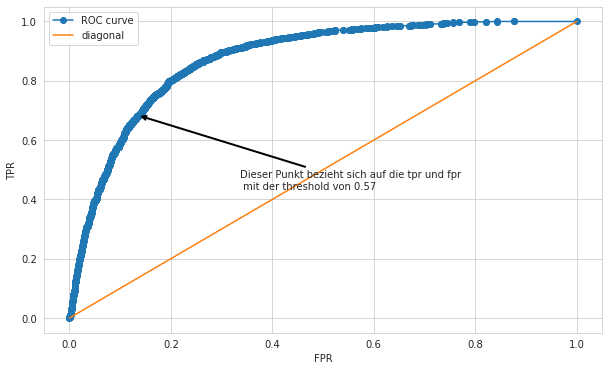

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(results['Label'], results['probability'])

plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")

rnd_idx = 750
plt.annotate(
             'Dieser Punkt bezieht sich auf die tpr und fpr\n mit der threshold von {}'.format(np.round(thresholds[rnd_idx], 2)),
             xy=(fpr[rnd_idx],
             tpr[rnd_idx]),
             xytext=(fpr[rnd_idx]+0.2,
             tpr[rnd_idx]-0.25),
             arrowprops=dict(
             color='Black',
             lw=2,
             arrowstyle='->')
            )
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

#### 4.8 Cut-Off-Point <a class="anchor" id="section_4_8"></a>

Cut-Off-Point ist der Wert zwischen 0 und 1, wobei Wahrscheinlichkeitswerte über diesem Wert als positiv und Wahrscheinlichkeitswerte unter diesem Wert als negativ eingestuft werden.

In [ ]:
fn = []
fp = []
accuracy = []
cut_off = []
recall = []
threshold = []
for i in range(0,1001, 1):
    cm = confusion_matrix(
        results['Label'],
        np.where(results['probability'] > (i/1000), 1, 0)
    )
    fn.append(cm[1][0])
    fp.append(cm[0][1])
    accuracy.append((cm[0][0] + cm[1][1])/(cm[0][0] + cm[1][1]+cm[0][1]+cm[1][0]))
    recall.append(cm[1][1]/(cm[1][1]+cm[1][0]))
    cut_off.append(i/1000)

In [ ]:
df_cut_off = pd.DataFrame([fn, fp, accuracy, cut_off, recall]).T
df_cut_off.columns = ['fn', 'fp', 'accuracy', 'cut_off', 'recall']

In [ ]:
df_cut_off.head()

,fn,fp,accuracy,cut_off,recall
0,0.0,4685.0,0.237840,0.000,1.0
1,0.0,4685.0,0.237840,0.001,1.0
2,0.0,4685.0,0.237840,0.002,1.0
3,0.0,4685.0,0.237840,0.003,1.0
4,0.0,4684.0,0.238002,0.004,1.0


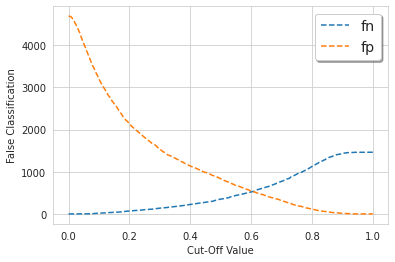

In [ ]:
fig, ax = plt.subplots()
ax.plot('cut_off', 'fn', data = df_cut_off, linestyle='dashed', label = 'fn')
ax.plot('cut_off', 'fp', data = df_cut_off, linestyle='dashed', label = 'fp')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.xlabel("Cut-Off Value")
plt.ylabel("False Classification")
plt.show()

##### Auswahl von Cut-Off-Point zur Maximierung von Accuracy

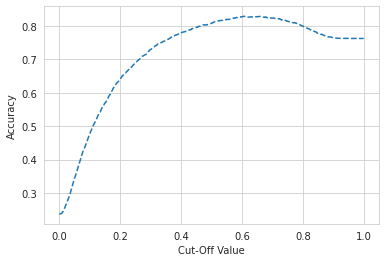

In [ ]:
fig, ax = plt.subplots()
ax.plot('cut_off', 'accuracy', data = df_cut_off, linestyle='dashed')
plt.xlabel("Cut-Off Value")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Das best Cut-Off-Point für Accuracy
best_cut_off = df_cut_off['cut_off'][df_cut_off['accuracy'].idxmax()]
best_cut_off

0.607

In [ ]:
# Die beste Accuracy mit dem besten Cut-Off.
df_cut_off['accuracy'].max()

0.8285342443468359

In [ ]:
# Nutzung des besten Cut-Off Resultat.
results['adjusted_prediction'] = np.where(results['probability'] >= best_cut_off, 1, 0)

Text(0.5, 42.0, 'Prediction')

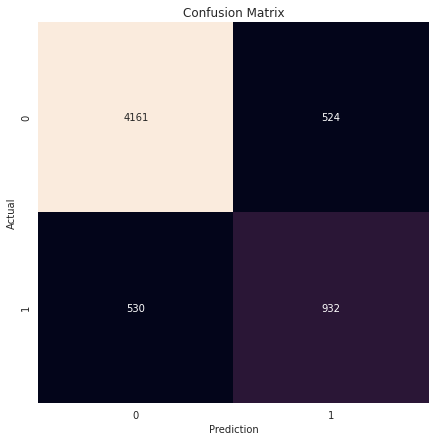

In [ ]:
# Konfusionsmatrix nach der Nutzung des besten Cut-Off Resultat
cm = confusion_matrix(results['Label'], results['adjusted_prediction'])
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')

In [ ]:
# Werte von Accuracy, Recall, Precision und AUC.
precision = precision_score(results['Label'], results['adjusted_prediction'])
recall = recall_score(results['Label'], results['adjusted_prediction'])
accuracy = accuracy_score(results['Label'], results['adjusted_prediction'])
print('Precision:', precision)
print('Recall:', recall)
print('Accurancy:', accuracy)

Precision: 0.6401098901098901
Recall: 0.6374829001367989
Accurancy: 0.8285342443468359


##### Auswahl von Cut-Off-Point zur Verbesserung von Recall mit angemessener Accuracy

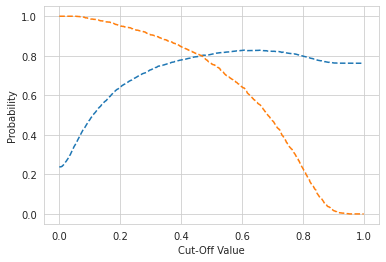

In [ ]:
fig, ax = plt.subplots()
ax.plot('cut_off', 'accuracy', data = df_cut_off, linestyle='dashed')
ax.plot('cut_off', 'recall', data = df_cut_off, linestyle='dashed')
plt.xlabel("Cut-Off Value")
plt.ylabel("Probability")
plt.show()

In [ ]:
# Schnittpunkt Zwischen Accuray und Recall
intersection = np.where(np.equal(np.round(df_cut_off.recall, 2) ,np.round(df_cut_off.accuracy, 2)))
intersection_index = intersection[0][0]

In [ ]:
# Werte von Accuracy und Recall mit die gemesene Schnittpunkt.
inter_recall = df_cut_off['recall'][intersection_index]
inter_accuracy = df_cut_off['accuracy'][intersection_index]
print("Accuracy:", inter_accuracy)
print("Recall:", inter_recall)

Accuracy: 0.7982755815845127
Recall: 0.8043775649794802


In [ ]:
# Nutzung von Schnittpunkt.
inter_cut_off = df_cut_off['cut_off'][intersection_index]
print('Cut-Off-Point in dem Schnittpunkt:', inter_cut_off)
results['adjusted_prediction_inter'] = np.where(results['probability'] >= inter_cut_off, 1, 0)

Cut-Off-Point in dem Schnittpunkt: 0.461


Text(0.5, 42.0, 'Prediction')

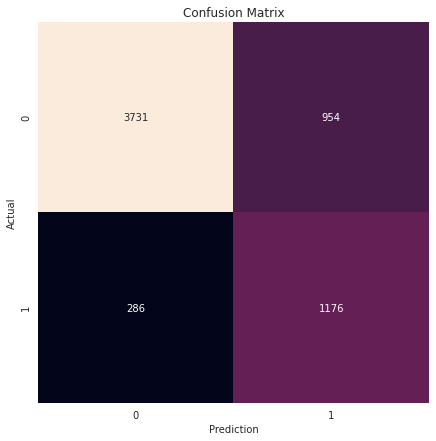

In [ ]:
# Konfusionsmatrix nach der Nutzung von Schnittpunkt
cm = confusion_matrix(results['Label'], results['adjusted_prediction_inter'])
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')

In [ ]:
# Werte von Accuracy, Recall, Precision und AUC mit die gemesene Schnittpunkt.
precision = precision_score(results['Label'], results['adjusted_prediction_inter'])
recall = recall_score(results['Label'], results['adjusted_prediction_inter'])
accuracy = accuracy_score(results['Label'], results['adjusted_prediction_inter'])
print('Precision:', precision)
print('Recall:', recall)
print('Accurancy:', accuracy)

Precision: 0.5521126760563381
Recall: 0.8043775649794802
Accurancy: 0.7982755815845127


In [ ]:
accuracy_cm = confusion_matrix(results['Label'], results['adjusted_prediction'])
inter_cm = confusion_matrix(results['Label'], results['adjusted_prediction_inter'])
new_potential_customers = (accuracy_cm[1][0] - inter_cm[1][0])
print(np.round(new_potential_customers/(inter_cm[1][0]+inter_cm[1][1]), 4)*100,"% neue mögliche Kunden, also" , new_potential_customers,  "Kunden, wurden im neuen Ansatz mitbetrachtet.")

16.689999999999998 % neue mögliche Kunden, also 244 Kunden, wurden im neuen Ansatz mitbetrachtet.


##### Accuracy Paradox
Wenn wir alle Daten als 0 klassifizieren, bekommen wir einen Modell, mit Accuracy von 76.22%

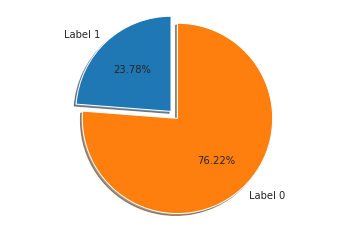

In [ ]:
# Die Verteilung des Labels über die Daten
# total_count = df.shape[0]
positive_count = df[df.Label == 1].shape[0]
negative_count = df[df.Label == 0].shape[0]

# Zeigen, wie die Daten nicht balanziert sind.
labels = 'Label 1', 'Label 0'
sizes = [positive_count, negative_count]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Ausprobierte, aber nicht verwendete Verfahren ... (Experimented but not used methods)

## Data Exploration

In [ ]:
# # Violin plots are used for numerical data! It doesn't make much sense here
# # Teilen die Kunden nach dem Erwerben von BF1Kart, dann zeigen, wie sich die Kunden nach ihrem Eigentum verteilen
# vp_eg =  sns.violinplot(x='Label', y ='Eigentum', data = df, inner="quartile")

In [ ]:
# # Das folgende Diagramm zeigt die Verteilung der Benutzer nach ihrem Eigentum in Bezug auf das Label an.
# sns.FacetGrid(df,hue='Label',height=5).map(sns.distplot,'Eigentum').add_legend()

In [ ]:
# Teilen die Kunden nach dem Erwerben von BF1Kart, dann zeigen, wie sich die Kunden nach ihrem Ausgefall verteilen
#vp_eg =  sns.violinplot(x='Label', y ='Ausgefallen', data = df, inner="quartile")

In [ ]:
# Das folgende Diagramm zeigt die Verteilung der Benutzer nach ihrem Ausgefall in Bezug auf das Label an.
#sns.FacetGrid(df,hue='Label',height=5).map(sns.distplot,'Ausgefallen').add_legend()

## Daten Säuberung

### Ausreißer Behandlung

Nur numerische Daten können Ausreißer enthalten, deswegen wurden die folgenden Verfahren auf die numerischen Merkmale ausgeführt.

#### Behandlung durch Vertauchung mid den Median

##### Alter

In [ ]:
# # Die Verteilung von Alter vor der Behandlung von Ausreißer
# plt.hist(df.Alter, bins=30, rwidth=0.8)
# plt.xlabel('Alter')
# plt.ylabel('Count')
# plt.show

In [ ]:
# ax = sns.boxplot(x="Label", y="Alter", data=df)

In [ ]:
# # Durch die in Boxplot benutzte Methode (IQR) werden die Ausreißer detektiert.
# # Um bessere Ergebnisse zu erhalten, werden die Ausreißer abhängig vom Label behandelt.
# # Nach die Detektion werden die Ausreißer mit dem Median des Merkmales ersetzt.

# Q1_1 = dta[dta.Label == 1].Alter.quantile(0.25)
# Q3_1 = dta[dta.Label == 1].Alter.quantile(0.75)
# median_1 = dta[dta.Label == 1].Alter.quantile(0.50)
# IQR_1 = Q3_1 - Q1_1

# ow_1 = Q3_1 + 1.5 * IQR_1
# uw_1 = Q1_1 - 1.5 * IQR_1

# Q1_0 = dta[dta.Label == 0].Alter.quantile(0.25)
# Q3_0 = dta[dta.Label == 0].Alter.quantile(0.75)
# median_0 = dta[dta.Label == 0].Alter.quantile(0.50)
# IQR_0 = Q3_0 - Q1_0

# ow_0 = Q3_0 + 1.5 * IQR_0
# uw_0 = Q1_0 - 1.5 * IQR_0

# dta.Alter = np.where(((dta['Alter'] > ow_1) & (dta['Label'] == 1)), median_1, dta['Alter'])
# dta.Alter = np.where(((dta['Alter'] < uw_1) & (dta['Label'] == 1)), median_1, dta['Alter'])

# dta.Alter = np.where(((dta['Alter'] > ow_0) & (dta['Label'] == 0)), median_0, dta['Alter'])
# dta.Alter = np.where(((dta['Alter'] < uw_0) & (dta['Label'] == 0)), median_0, dta['Alter'])

# # Die Verteilung von Alter nach der Behandlung von Ausreißer
# plt.hist(dta.Alter, bins=30, rwidth=0.8)
# plt.xlabel('Alter')
# plt.ylabel('Count')
# plt.show

In [ ]:
# ax = sns.boxplot(x="Label", y="Alter", data=dta)

##### Dauer

In [ ]:
# # Die Verteilung von Dauer vor der Behandlung von Ausreißer
# plt.hist(df.Dauer, bins=30, rwidth=0.8)
# plt.xlabel('Dauer')
# plt.ylabel('Count')
# plt.show

In [ ]:
# ax = sns.boxplot(x="Label", y="Dauer", data=df)

In [ ]:
# Q1_1 = dta[dta.Label == 1].Dauer.quantile(0.25)
# Q3_1 = dta[dta.Label == 1].Dauer.quantile(0.75)
# median_1 = dta[dta.Label == 1].Dauer.quantile(0.50)
# IQR_1 = Q3_1 - Q1_1

# ow_1 = Q3_1 + 1.5 * IQR_1
# uw_1 = Q1_1 - 1.5 * IQR_1

# Q1_0 = dta[dta.Label == 0].Dauer.quantile(0.25)
# Q3_0 = dta[dta.Label == 0].Dauer.quantile(0.75)
# median_0 = dta[dta.Label == 0].Dauer.quantile(0.50)
# IQR_0 = Q3_0 - Q1_0

# ow_0 = Q3_0 + 1.5 * IQR_0
# uw_0 = Q1_0 - 1.5 * IQR_0


# dta.Dauer = np.where(((dta['Dauer'] > ow_1) & (dta['Label'] == 1)), median_1, dta['Dauer'])
# dta.Dauer = np.where(((dta['Dauer'] < uw_1) & (dta['Label'] == 1)), median_1, dta['Dauer'])

# dta.Dauer = np.where(((dta['Dauer'] > ow_0) & (dta['Label'] == 0)), median_0, dta['Dauer'])
# dta.Dauer = np.where(((dta['Dauer'] < uw_0) & (dta['Label'] == 0)), median_0, dta['Dauer'])

# # Die Verteilung von Dauer nach der Behandlung von Ausreißer
# plt.hist(dta.Dauer, bins=30, rwidth=0.8)
# plt.xlabel('Dauer')
# plt.ylabel('Count')
# plt.show

In [ ]:
# ax = sns.boxplot(x="Label", y="Dauer", data=dta)

##### Kontostand


In [ ]:
# # Die Verteilung von Kontostand vor der Behandlung von Ausreißer
# plt.hist(df.Kontostand, bins=30, rwidth=0.8)
# plt.xlabel('Kontostand')
# plt.ylabel('Count')
# plt.show

In [ ]:
# ax = sns.boxplot(x="Label", y="Kontostand", data=df)

In [ ]:
# Q1_1 = dta[dta.Label == 1].Kontostand.quantile(0.25)
# Q3_1 = dta[dta.Label == 1].Kontostand.quantile(0.75)
# median_1 = dta[dta.Label == 1].Kontostand.quantile(0.50)
# IQR_1 = Q3_1 - Q1_1

# ow_1 = Q3_1 + 1.5 * IQR_1
# uw_1 = Q1_1 - 1.5 * IQR_1

# Q1_0 = dta[dta.Label == 0].Kontostand.quantile(0.25)
# Q3_0 = dta[dta.Label == 0].Kontostand.quantile(0.75)
# median_0 = dta[dta.Label == 0].Kontostand.quantile(0.50)
# IQR_0 = Q3_0 - Q1_0

# ow_0 = Q3_0 + 1.5 * IQR_0
# uw_0 = Q1_0 - 1.5 * IQR_0

# dta.Kontostand = np.where(((dta['Kontostand'] > ow_1) & (dta['Label'] == 1)), median_1, dta['Kontostand'])
# dta.Kontostand = np.where(((dta['Kontostand'] < uw_1) & (dta['Label'] == 1)), median_1, dta['Kontostand'])

# dta.Kontostand = np.where(((dta['Kontostand'] > ow_0) & (dta['Label'] == 0)), median_0, dta['Kontostand'])
# dta.Kontostand = np.where(((dta['Kontostand'] < uw_0) & (dta['Label'] == 0)), median_0, dta['Kontostand'])

# # Die Verteilung von Kontostand nach der Behandlung von Ausreißer
# plt.hist(dta.Kontostand, bins=30, rwidth=0.8)
# plt.xlabel('Kontostand')
# plt.ylabel('Count')
# plt.show

In [ ]:
# ax = sns.boxplot(x="Label", y="Kontostand", data=dta)

#### Behandlung durch Löschen  


In [ ]:
# D_Q1_1 = X_train[X_train.Label == 1].Dauer.quantile(0.25)
# D_Q3_1 = X_train[X_train.Label == 1].Dauer.quantile(0.75)
# D_median_1 = X_train[X_train.Label == 1].Dauer.quantile(0.50)
# D_IQR_1 = D_Q3_1 - D_Q1_1

# dow_1 = D_Q3_1 + 1.5 * D_IQR_1
# duw_1 = D_Q1_1 - 1.5 * D_IQR_1

# D_Q1_0 = X_train[X_train.Label == 0].Dauer.quantile(0.25)
# D_Q3_0 = X_train[X_train.Label == 0].Dauer.quantile(0.75)
# D_median_0 = X_train[X_train.Label == 0].Dauer.quantile(0.50)
# D_IQR_0 = D_Q3_0 - D_Q1_0

# dow_0 = D_Q3_0 + 1.5 * D_IQR_0
# duw_0 = D_Q1_0 - 1.5 * D_IQR_0

# X_train = X_train[((X_train['Label'] == 1) & ((X_train['Dauer'] < dow_1) & (X_train['Dauer'] > duw_1)))
#         | ((X_train['Label'] == 0) & ((X_train['Dauer'] < dow_0) & (X_train['Dauer'] > duw_0)))]

# print(X_train.shape)

# plt.hist(X_train.Dauer, bins=30, rwidth=0.8)


# # ================================================


# K_Q1_1 = X_train[X_train.Label == 1].Kontostand.quantile(0.25)
# K_Q3_1 = X_train[X_train.Label == 1].Kontostand.quantile(0.75)
# k_median_1 = X_train[X_train.Label == 1].Kontostand.quantile(0.50)
# K_IQR_1 = D_Q3 - D_Q1

# kow_1 = K_Q3_1 + 1.5 * K_IQR_1
# kuw_1 = K_Q1_1 - 1.5 * K_IQR_1

# K_Q1_0 = X_train[X_train.Label == 0].Kontostand.quantile(0.25)
# K_Q3_0 = X_train[X_train.Label == 0].Kontostand.quantile(0.75)
# k_median_0 = X_train[X_train.Label == 0].Kontostand.quantile(0.50)
# K_IQR_0 = K_Q3_0 - K_Q1_0

# kow_0 = K_Q3_0 + 1.5 * K_IQR_0 #
# kuw_0 = K_Q1_0 - 1.5 * K_IQR_0 #

# X_train = X_train[((X_train['Label'] == 1) & ((X_train['Kontostand'] < kow_1) & (X_train['Kontostand'] > kuw_1)))
#         | ((X_train['Label'] == 0) & ((X_train['Kontostand'] < kow_0) & (X_train['Kontostand'] > kuw_0)))]

# print(X_train.shape)
# plt.hist(X_train.Kontostand, bins=30, rwidth=0.8)


# # ================================================



# D_Q1_1 = X_train[X_train.Label == 1].Alter.quantile(0.25)
# D_Q3_1 = X_train[X_train.Label == 1].Alter.quantile(0.75)
# D_median_1 = X_train[X_train.Label == 1].Alter.quantile(0.50)
# D_IQR_1 = D_Q3_1 - D_Q1_1

# dow_1 = D_Q3_1 + 1.5 * D_IQR_1
# duw_1 = D_Q1_1 - 1.5 * D_IQR_1

# D_Q1_0 = X_train[X_train.Label == 0].Alter.quantile(0.25)
# D_Q3_0 = X_train[X_train.Label == 0].Alter.quantile(0.75)
# D_median_0 = X_train[X_train.Label == 0].Alter.quantile(0.50)
# D_IQR_0 = D_Q3_0 - D_Q1_0

# dow_0 = D_Q3_0 + 1.5 * D_IQR_0 #
# duw_0 = D_Q1_0 - 1.5 * D_IQR_0 #

# X_train = X_train[((X_train['Label'] == 1) & ((X_train['Alter'] < dow_1) & (X_train['Alter'] > duw_1)))
#         | ((X_train['Label'] == 0) & ((X_train['Alter'] < dow_0) & (X_train['Alter'] > duw_0)))]

# print(X_train.shape)

# plt.hist(X_train.Alter, bins=30, rwidth=0.8)

### Merkmalsauswahl

Merkmalsauswahl durch Korrelation

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

In [ ]:
# # Die Korrelation zwischen der Merkmale nach Einführung von Dummy-Varialen
# fig_dims = (12, 8)
# fig, ax = plt.subplots(figsize = fig_dims)
# sns.heatmap(dta.corr(), ax = ax)
# plt.show()

In [ ]:
# # Die Korrelation zwischen dem Label und andere Merkmale
# abs(dta.corr()['Label'])

In [ ]:
## Die Merkmale werden zuerst nach ihrer Korrelation mit dem Label sortiert.
## Schrittweise werden Merkmale entfernt, die weniger Korrelation mit dem Label haben.
## Dabei und in jedem Schritt wird die Accuracy berechnet.
## Im Schritt, wo die Accuracy am höchsten ist werden die Merkmale genommen.

# from sklearn.metrics import accuracy_score

# val = 0.01
# ac_val = []
# features = dta.columns.tolist()

# while val <= 0.2:

#     features = abs(dta.corr()['Label'][abs(dta.corr()['Label']) > val].drop('Label')).index.tolist()
#     print(features)

#     X2_test = X_test[features]
#     X2_train = X_train[features]

#     model_rf = RandomForestClassifier(random_state = 4711, n_estimators=100, min_samples_split= 15, min_samples_leaf= 2, max_depth= 100)
#     model_rf.fit(X2_train, y_train)

#     results = X2_test.copy()
#     results['Label'] = y_test
#     results['prediction'] = model_rf.predict(X2_test)

#     accuracy = accuracy_score(results['Label'], results['prediction'])
#     print(accuracy)
#     print(val)
#     ac_val.append([val, accuracy])

#     val = val + 0.01

# ac_val

In [ ]:
## Hier wird der beste Schwellenwert für die Korrelation berechnet.

# asdf = np.array(ac_val)
# # the value of the best accuracy
# asdf[asdf[:,1].argmax(axis=0),0]  # == 0.06

In [ ]:
# # "good_features" heißt die Merkmale mit höher Korrelationswert als dem Schwellenwert.

# good_features = abs(dta.corr()['Label'][abs(dta.corr()['Label']) > 0.06].drop('Label')).index.tolist()

# fig_dims = (12, 8)
# fig, ax = plt.subplots(figsize = fig_dims)
# sns.heatmap(dta[good_features].corr(), ax = ax)
# plt.show()

In [ ]:
# # Die Merkmale mit weniger Korrelationswert als dem Schwellenwert werden aus dem Datafram entfernt.

# print(good_features)
# X_test = X_test[good_features]
# X_train = X_train[good_features]

#### Merkmalsauswahl mit hilfe eines Wrappers mit Kreuzvalidierung

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# !pip install mlxtend
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# rf = RandomForestClassifier()
# sfsl = SFS(rf,
#            k_features = len(dta.columns) - 1,
#            forward=True,
#            scoring='accuracy',
#            cv=3,
#            verbose = 2,
#            n_jobs = -1
#            )
# sfsl.fit(X_train, y_train)
# sfsl.subsets_

# # good_features = ['Beruf_Angestellter',
# #  'Beruf_Arbeitslos',
# #  'Beruf_Hausgehilfin',
# #  'Beruf_Techniker',
# #  'Ausbildung_Hochschulabschluss',
# #  'Alter',
# #  'Darlehen',
# #  'Dauer',
# #  'Eigentum',
# #  'Kontostand']
# # print(good_features)
# # X_test = X_test[good_features]
# # X_train = X_train[good_features]

#### Filter Features by Variance

In [ ]:
# X_train.var()

In [ ]:
# X_train = X_train.drop(columns=['Ausgefallen', 'Beruf_Hausgehilfin'])

### Principal Component Analysis (PCA)

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler


# scaleddt = preprocessing.scale(X_train)
# pca = PCA()
# pca.fit(scaleddt)
# pca_dt = pca.transform(scaleddt)

# per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
# labels = ['PC'+ str(x) for x in range(1, len(per_var)+1)]
# plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label=labels)
# plt.xlabel('Principal Component')
# plt.ylabel('Percentage of Explained Variance')
# plt.title('Scree Plot')
# plt.show()

# x_new1 = X_train.values
# y_new1 = y_train.values
# x_new1 = StandardScaler().fit_transform(x_new1)

# pca = PCA(n_components = 5)
# principalComponents = pca.fit_transform(x_new1)
# principaldt = pd.DataFrame(data = principalComponents, columns=['Principal component 1','Principal component 2','Principal component 3','Principal component 4','Principal component 5'])
# finaldt = pd.concat([principaldt, y_train], axis = 1)

# pca.explained_variance_ratio_

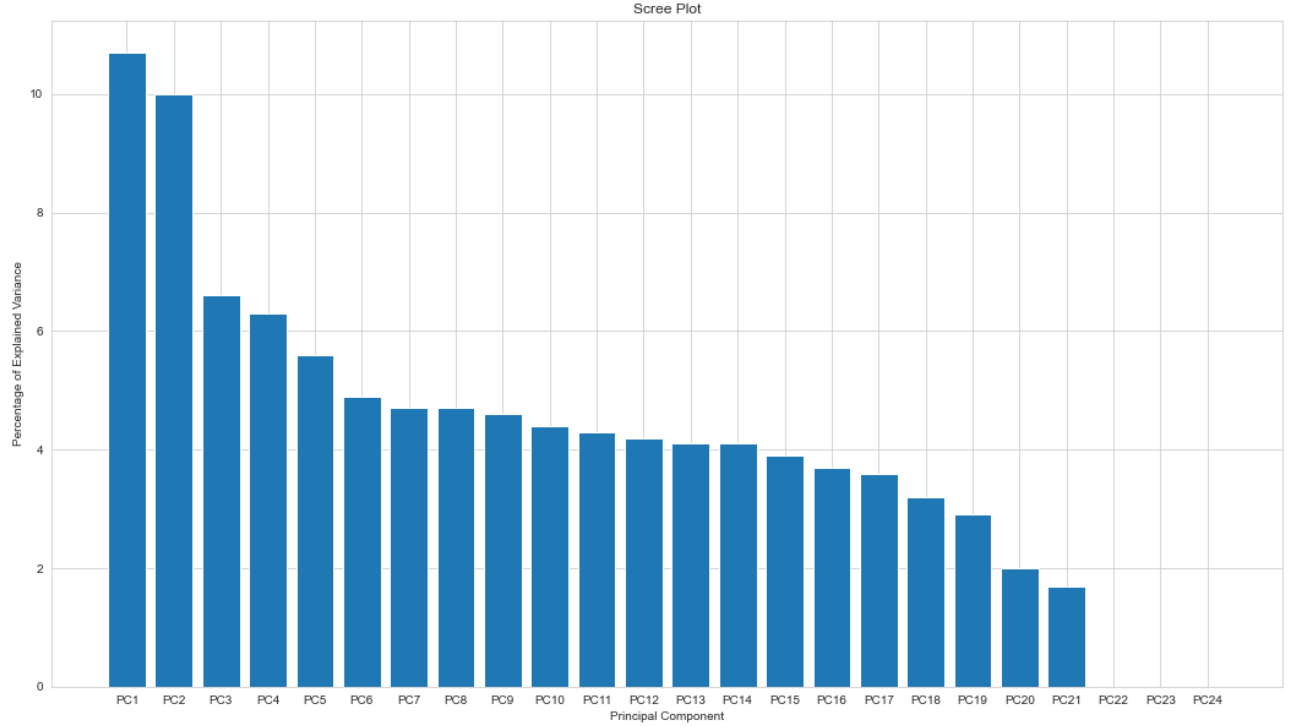

array([0.10692197, 0.0998076 , 0.06628306, 0.06261771, 0.05552994])

In [ ]:
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel('PC1', fontsize = 12)
# ax.set_ylabel('PC2', fontsize = 12)
# ax.set_title('2 Component PCA', fontsize = 16)

# Labels = [0,1]
# colors = ['r','b']
# for label,color in zip(Labels,colors):
#     indicesToKeep = finaldt['Label'] == label
#     ax.scatter(finaldt.loc[indicesToKeep, 'Principal component 1'],
#               finaldt.loc[indicesToKeep, 'Principal component 2'],
#               c = color,
#               s = 50)
#     ax.legend(Labels)
#     ax.grid()

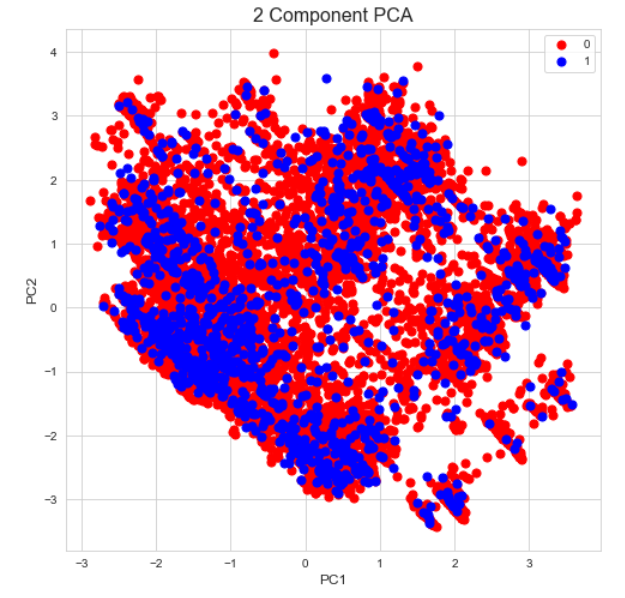

In [ ]:
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel('PC2', fontsize = 12)
# ax.set_ylabel('PC3', fontsize = 12)
# ax.set_title('2 Component PCA', fontsize = 16)

# Labels = [0,1]
# colors = ['r','b']
# for label,color in zip(Labels,colors):
#     indicesToKeep = finaldt['Label'] == label
#     ax.scatter(finaldt.loc[indicesToKeep, 'Principal component 2'],
#               finaldt.loc[indicesToKeep, 'Principal component 3'],
#               c = color,
#               s = 50)
#     ax.legend(Labels)
#     ax.grid()

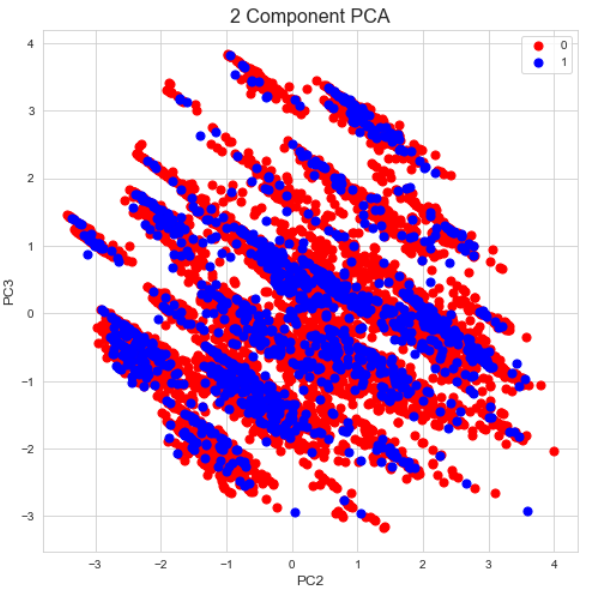

In [ ]:
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel('PC1', fontsize = 12)
# ax.set_ylabel('PC3', fontsize = 12)
# ax.set_title('2 Component PCA', fontsize = 16)

# Labels = [0,1]
# colors = ['r','b']
# for label,color in zip(Labels,colors):
#     indicesToKeep = finaldt['Label'] == label
#     ax.scatter(finaldt.loc[indicesToKeep, 'Principal component 1'],
#               finaldt.loc[indicesToKeep, 'Principal component 3'],
#               c = color,
#               s = 50)
#     ax.legend(Labels)
#     ax.grid()

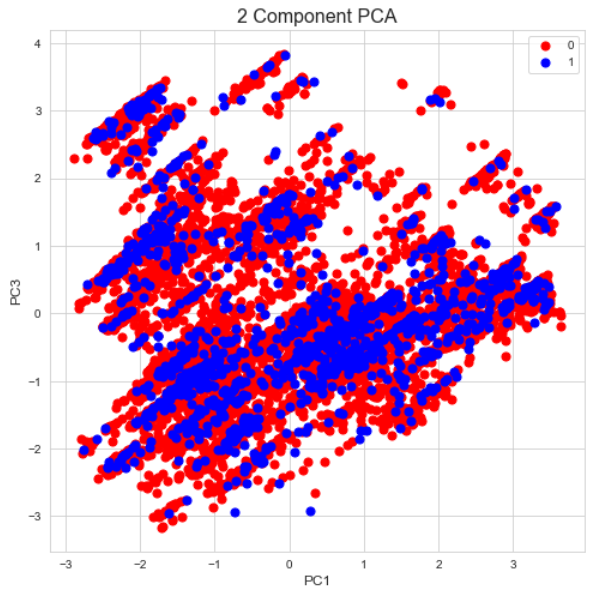

# Projekt Timeline und TODOs


- Code TODOs
    1. Es ist gut, falls wir  XAI nutzten, damit wir extra punkte haben können.
    2. Nicht nur Accuracy wird für die Bewertung von das Projekt verwendt
        - Abdeckung aller Phasen eines Data-Mining-Projekt.

            Wir müssen Sagen, dass wir Cross-industry standard process for data mining (CRISP-DM) benutzt haben.
            Es ist am besten, wenn alle Schritte des Projektes detaliert beschrieben wird, damit alle verstehen können worum es geht und es ist auch gut für die Präsentation.

            - Datenverständnis
                - Wir müssen die Qualität der Daten bestimmen.
                - (Wertetypen, Kodierung)
                - Welche Merkmale sind am meisten relevant.
                - Sind die Daten ausreichend
                - Du kannst die Diagramme benennen
                - Ausreißer Analyse mit (Box plot)
                - Korrelationsmatix (Welche Merkmale sind stark miteinander korreliert?)
                - Welches Plot soll mit welchem Attribut benutzt werden?
                
            - Datenaufbereitung
                - Datensäuberung
                    - Ausreißer behandeln (Done)
                    - Aggregierte Werte berechnen (Keine Mögliche Aggregation gefunden)
                    - Feature Selection (Done)
                    - Nicht relevante Spalten löschen (Done)
                    - Fehlende Felder füllen für die wichtige Felder (Done)
                        - durch globale Konstante oder
                        - Durchschnittswert oder
                        - Häufigster Wert oder
                        - Relation zwischen Merkamle
                    - Fehlerhafte Datensätze löschen (Done)
                - Datenreduktion
                    - Dimensionsreduktion mit Principal Componaent Analysis (PCA)  (Done)
                    - Aggregation (Keine Mögliche Aggregation gefunden)
                    - Datenkompression (Falls möglich)
                - Merkmalserzeugung (Nicht geeignet für dieses Projekt)
                - Normalisierung und Standardisierung

                    Dominanz der Merkmale kann zu falschen Vorhersagen führen.

                    - Min-Max-Skalierung (Falls nötig)
                    - Standardisierung (Falls nötig)
            - Modellierung
                - Nutzung von Randomforest.
                - Einsatz von Hyperparameteroptimierung

                    Mit Grid oder mit Randomized Search mir Kreuzvalidieurng

            - Evaluation
                - Konfusion-Matrix und mit der Matrix verbundene Kenngrößen.
                - Wahrheitsmatrix

                    Richtig Positiv (RP)

                    Falsch Positiv (FP)

                    Falsch Negativ (FN)

                    Richtig Negativ (RN)

                - Metriken
                    - Klassifikationsgenauigkeit

                        Erklären sie warum Accuracy nicht immer helfreich ist.

                    - Klassifikationsfehler
                    - Präzision
                    - Sensitivität
                    - F-Maß
                - ROC-Kurve & AUC

- Präsentaion TODOs
    - Vorbereitung von Power Point-Datei
    - Ergebnisse und Erkenntnisse müssen eingegeben werden.
    - Alle müssen der Algorithmus (Randomforest) verstehen und erklären können.
    - Wir alle müssen die Implementierung verstehen. Falls jemand Fragen hat oder etwas nicht versteht bitte frag die Anderen.

# Timeline des Projekts  
1. 21/12: Alle Code TODOs müssen vollständig oder teilweise fertig gemacht und am 21:00 21/12 in einem Meeting diskutiert werden. Die jetztige situation muss dann mit dem Dozent geteiligt und diskutiert werden.
2. 28/12: Alle Code Todos müssen vollständig fertig sein. Der Code muss bereinigt und kommentiert werden. Am 28/12 Werden wir die jetztige Situation des Codes besprechen, falls es nötige modifikationen nötig ist. Die Verteilung der Rollen, der Ablauf und die Gliederung der Präsentation muss bestimmt werden.
3. 04/01: Die Vorbereitung für die Präsentation muss vollständig oder teilweise fertig gemacht werden. Eine Diskussion über den Zustand der Präsentation kann dann in diesem Datum erfolgen.
4. 09/01 oder 10/01: Bei Bedarf können wir uns am 09/01 oder 10/01 und die Arbeit finalizieren.

## Notes:
- Die Situation des Codes kann jederzeit modifiziert werden, falls man es nötig findet oder falls es um Verbesserungen geht.
- Jeder Muss die Anderen erklären was er im Code gemacht hat.
- Alle sollten in der lage sein, das ganze Projekt zu erklären und verstehen.